# Predicting the Batting Average

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
# Load the cleaned dataset
file_path = "Data/Final_Batting.csv"
df = pd.read_csv(file_path)

In [191]:
df.head()

,Player Name,Born,Batting Style,Bowling Style,Playing Role,Innings_ODI_batting,Innings_T20_batting,Innings_Test_batting,NO_ODI,NO_T20,...,T20_Matches,Test_Matches,Country,SpanStart_ODI,SpanStart_Test,SpanStart_T20,Bowling Hand,AgeStart_ODI,AgeStart_Test,AgeStart_T20
0,A Athanaze,1998-12-07,Left hand Bat,Spinner,Batter,10,1,13,0,1,...,1,7,WI,2023,2023,2024,Right Hand,24.643836,24.643836,25.643836
1,A Balbirnie,1990-12-28,Right hand Bat,Spinner,Batter,102,106,18,8,4,...,110,9,IRE,2010,2018,2015,Right Hand,19.586301,27.586301,24.586301
2,A Dananjaya,1993-10-04,Left hand Bat,Spinner,Allrounder,30,16,10,6,8,...,33,6,SL,2012,2018,2012,Right Hand,18.819178,24.819178,18.819178
3,A Symonds,1975-06-09,Right hand Bat,Spinner,Allrounder,161,11,41,33,4,...,14,26,AUS,1998,2004,2005,Right Hand,23.080000,29.080000,30.080000
4,AB Barath,1990-04-14,Right hand Bat,Spinner,Batter,14,2,28,1,0,...,2,15,WI,2010,2009,2010,Right Hand,20.290411,19.290411,20.290411


In [192]:
df.columns

Index(['Player Name', 'Born', 'Batting Style', 'Bowling Style', 'Playing Role',
       'Innings_ODI_batting', 'Innings_T20_batting', 'Innings_Test_batting',
       'NO_ODI', 'NO_T20', 'NO_Test', 'Runs_ODI_batting', 'Runs_T20_batting',
       'Runs_Test_batting', 'HS_ODI', 'HS_T20', 'HS_Test', 'Ave_ODI_batting',
       'Ave_T20_batting', 'Ave_Test_batting', 'BF_ODI', 'BF_T20',
       'SR_ODI_batting', 'SR_T20_batting', '100_ODI', '100_T20', '100_Test',
       '50_ODI', '50_T20', '50_Test', '0_ODI', '0_T20', '0_Test',
       'Innings_ODI_bowling', 'Innings_T20_bowling', 'Innings_Test_bowling',
       'Balls_ODI', 'Balls_Test', 'Runs_ODI_bowling', 'Runs_T20_bowling',
       'Runs_Test_bowling', 'Wickets_ODI', 'Wickets_T20', 'Wickets_Test',
       'BBI_ODI', 'BBI_T20', 'BBI_Test', 'Ave_ODI_bowling', 'Ave_T20_bowling',
       'Ave_Test_bowling', 'Econ_ODI', 'Econ_T20', 'Econ_Test',
       'SR_ODI_bowling', 'SR_T20_bowling', 'SR_Test_bowling', '4_ODI', '4_T20',
       '5_ODI', '5_T20', '5_Te

In [193]:
bowl_cols = ['Bowling Style', 'Innings_ODI_bowling', 'Innings_T20_bowling', 'Innings_Test_bowling',
       'Balls_ODI', 'Balls_Test', 'Runs_ODI_bowling', 'Runs_T20_bowling',
       'Runs_Test_bowling', 'Wickets_ODI', 'Wickets_T20', 'Wickets_Test',
       'BBI_ODI', 'BBI_T20', 'BBI_Test', 'Ave_ODI_bowling', 'Ave_T20_bowling',
       'Ave_Test_bowling', 'Econ_ODI', 'Econ_T20', 'Econ_Test',
       'SR_ODI_bowling', 'SR_T20_bowling', 'SR_Test_bowling', '4_ODI', '4_T20',
       '5_ODI', '5_T20', '5_Test', '10_Test', 'Bowling Hand']

In [194]:
# Dropping Bowling stats
df_bat = df.drop(columns=bowl_cols)

## ODI Batting Average

In [195]:
odi_cols = [column for column in df_bat.columns if "ODI" in column and 'Ave_ODI_batting' != column] 

In [196]:
odi_cols

['Innings_ODI_batting',
 'NO_ODI',
 'Runs_ODI_batting',
 'HS_ODI',
 'BF_ODI',
 'SR_ODI_batting',
 '100_ODI',
 '50_ODI',
 '0_ODI',
 'ODI_Matches',
 'SpanStart_ODI',
 'AgeStart_ODI']

In [197]:
# Dropping Bowling stats
df_bat_odi = df_bat.drop(columns=odi_cols)

In [198]:
df_bat_odi.columns

Index(['Player Name', 'Born', 'Batting Style', 'Playing Role',
       'Innings_T20_batting', 'Innings_Test_batting', 'NO_T20', 'NO_Test',
       'Runs_T20_batting', 'Runs_Test_batting', 'HS_T20', 'HS_Test',
       'Ave_ODI_batting', 'Ave_T20_batting', 'Ave_Test_batting', 'BF_T20',
       'SR_T20_batting', '100_T20', '100_Test', '50_T20', '50_Test', '0_T20',
       '0_Test', 'T20_Matches', 'Test_Matches', 'Country', 'SpanStart_Test',
       'SpanStart_T20', 'AgeStart_Test', 'AgeStart_T20'],
      dtype='object')

In [199]:
df_bat_odi.drop(columns=["Born"], inplace=True)

In [200]:
df_bat_odi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player Name           350 non-null    object 
 1   Batting Style         350 non-null    object 
 2   Playing Role          350 non-null    object 
 3   Innings_T20_batting   350 non-null    int64  
 4   Innings_Test_batting  350 non-null    int64  
 5   NO_T20                350 non-null    int64  
 6   NO_Test               350 non-null    int64  
 7   Runs_T20_batting      350 non-null    int64  
 8   Runs_Test_batting     350 non-null    int64  
 9   HS_T20                350 non-null    int64  
 10  HS_Test               350 non-null    int64  
 11  Ave_ODI_batting       350 non-null    float64
 12  Ave_T20_batting       350 non-null    float64
 13  Ave_Test_batting      350 non-null    float64
 14  BF_T20                350 non-null    int64  
 15  SR_T20_batting        3

In [201]:
num_features = [feature for feature in df_bat_odi.columns if df_bat_odi[feature].dtype != 'O']
print(num_features)
df_bat_odi[num_features].head()

['Innings_T20_batting', 'Innings_Test_batting', 'NO_T20', 'NO_Test', 'Runs_T20_batting', 'Runs_Test_batting', 'HS_T20', 'HS_Test', 'Ave_ODI_batting', 'Ave_T20_batting', 'Ave_Test_batting', 'BF_T20', 'SR_T20_batting', '100_T20', '100_Test', '50_T20', '50_Test', '0_T20', '0_Test', 'T20_Matches', 'Test_Matches', 'SpanStart_Test', 'SpanStart_T20', 'AgeStart_Test', 'AgeStart_T20']


,Innings_T20_batting,Innings_Test_batting,NO_T20,NO_Test,Runs_T20_batting,Runs_Test_batting,HS_T20,HS_Test,Ave_ODI_batting,Ave_T20_batting,...,50_T20,50_Test,0_T20,0_Test,T20_Matches,Test_Matches,SpanStart_Test,SpanStart_T20,AgeStart_Test,AgeStart_T20
0,1,13,1,0,6,310,6,82,28.80,0.00,...,0,1,0,1,1,7,2023,2024,24.643836,25.643836
1,106,18,4,1,2392,401,83,95,32.00,23.45,...,12,4,6,3,110,9,2018,2015,27.586301,24.586301
2,16,10,8,2,65,135,11,43,12.12,8.12,...,0,0,2,3,33,6,2018,2012,24.819178,18.819178
3,11,41,4,5,337,1462,85,162,39.75,48.14,...,2,10,2,4,14,26,2004,2005,29.080000,30.080000
4,2,28,0,0,23,657,15,104,30.30,11.50,...,0,4,0,2,2,15,2009,2010,19.290411,20.290411


#### Discrete Features

In [202]:
discrete_features = [feature for feature in num_features if len(df_bat_odi[feature].unique()) < 25]
print(discrete_features)

['100_T20', '0_T20', '0_Test', 'SpanStart_T20']


100_T20
0    0.922857
1    0.048571
2    0.014286
3    0.005714
4    0.002857
5    0.005714
Name: Ave_ODI_batting, dtype: float64
100_T20
0    323
1     17
2      5
3      2
5      2
4      1
Name: count, dtype: int64


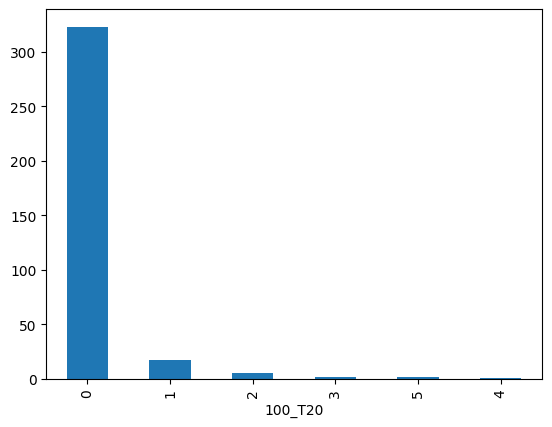

0_T20
0     0.337143
1     0.185714
2     0.174286
3     0.071429
4     0.062857
5     0.048571
6     0.042857
7     0.031429
8     0.014286
9     0.008571
10    0.005714
11    0.002857
12    0.005714
13    0.008571
Name: Ave_ODI_batting, dtype: float64
0_T20
0     118
1      65
2      61
3      25
4      22
5      17
6      15
7      11
8       5
9       3
13      3
12      2
10      2
11      1
Name: count, dtype: int64


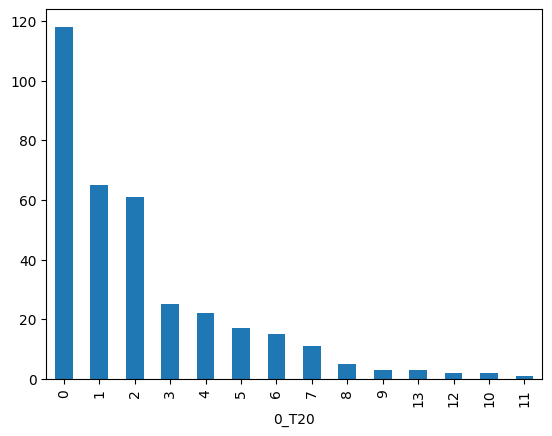

0_Test
0     0.220000
1     0.185714
2     0.125714
3     0.097143
4     0.074286
5     0.040000
6     0.040000
7     0.034286
8     0.037143
9     0.028571
10    0.022857
11    0.017143
12    0.020000
13    0.011429
14    0.025714
15    0.011429
17    0.002857
19    0.002857
22    0.002857
Name: Ave_ODI_batting, dtype: float64
0_Test
0     77
1     65
2     44
3     34
4     26
5     14
6     14
8     13
7     12
9     10
14     9
10     8
12     7
11     6
13     4
15     4
17     1
22     1
19     1
Name: count, dtype: int64


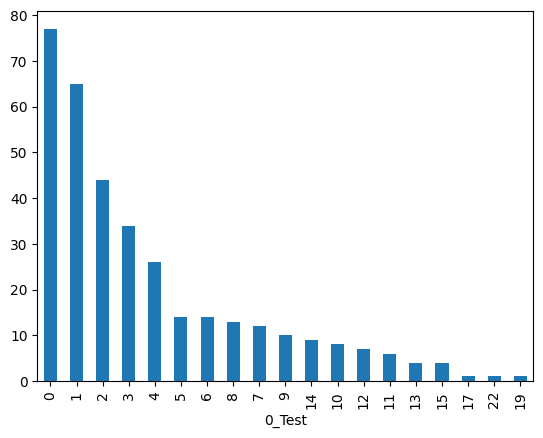

SpanStart_T20
2005    0.051429
2006    0.117143
2007    0.082857
2008    0.048571
2009    0.062857
2010    0.082857
2011    0.065714
2012    0.057143
2013    0.034286
2014    0.034286
2015    0.040000
2016    0.054286
2017    0.045714
2018    0.034286
2019    0.060000
2020    0.020000
2021    0.048571
2022    0.037143
2023    0.011429
2024    0.011429
Name: Ave_ODI_batting, dtype: float64
SpanStart_T20
2006    41
2010    29
2007    29
2011    23
2009    22
2019    21
2012    20
2016    19
2005    18
2008    17
2021    17
2017    16
2015    14
2022    13
2014    12
2018    12
2013    12
2020     7
2024     4
2023     4
Name: count, dtype: int64


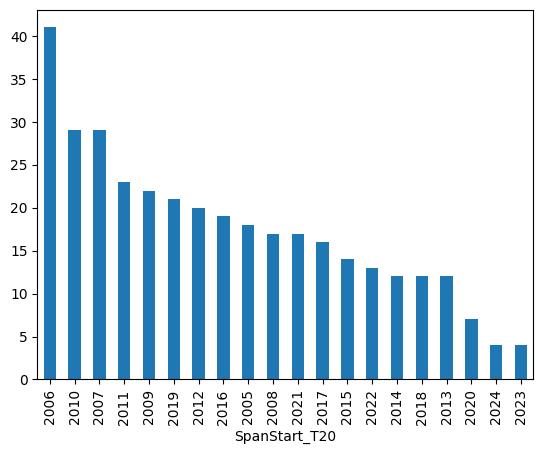

In [203]:
for feature in discrete_features:
    data = df_bat_odi.copy() 
    print(data.groupby(feature)['Ave_ODI_batting'].count() / len(data))
    print(data[feature].value_counts())
    data[feature].value_counts().plot.bar()
    plt.show()

100_T20
0    0.889040
1    0.071363
2    0.020026
3    0.008325
4    0.002627
5    0.008619
Name: Ave_ODI_batting, dtype: float64


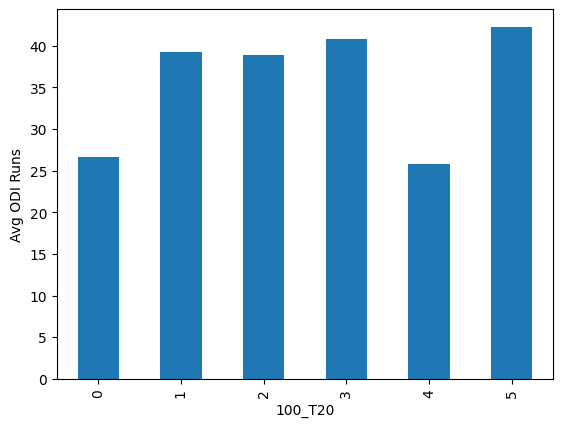

0_T20
0     0.292834
1     0.183884
2     0.175844
3     0.072753
4     0.070900
5     0.056364
6     0.056061
7     0.039802
8     0.015196
9     0.009053
10    0.007507
11    0.002243
12    0.008009
13    0.009551
Name: Ave_ODI_batting, dtype: float64


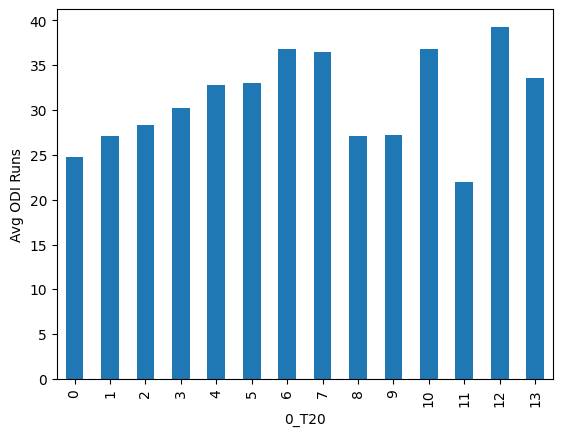

0_Test
0     0.184004
1     0.160423
2     0.120286
3     0.098036
4     0.081276
5     0.045961
6     0.043382
7     0.043889
8     0.036848
9     0.035563
10    0.028143
11    0.022954
12    0.027716
13    0.011880
14    0.033685
15    0.014554
17    0.004382
19    0.003186
22    0.003831
Name: Ave_ODI_batting, dtype: float64


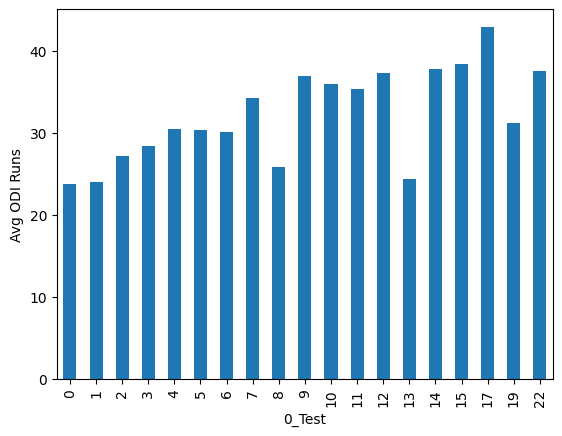

SpanStart_T20
2005    0.060538
2006    0.125111
2007    0.090071
2008    0.040483
2009    0.057974
2010    0.079116
2011    0.067180
2012    0.052324
2013    0.028037
2014    0.027008
2015    0.036430
2016    0.068051
2017    0.054282
2018    0.028694
2019    0.064225
2020    0.017174
2021    0.051262
2022    0.033059
2023    0.008476
2024    0.010505
Name: Ave_ODI_batting, dtype: float64


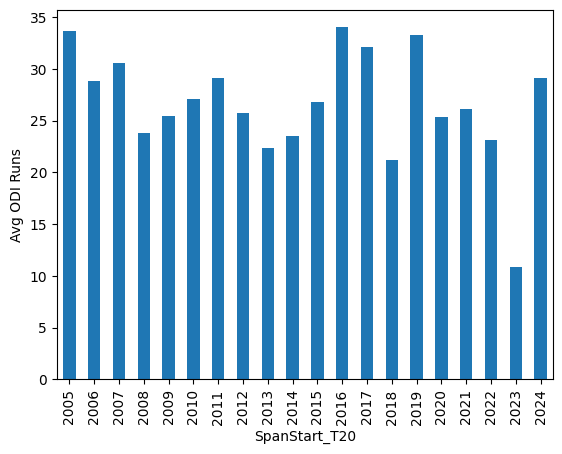

In [204]:
for feature in discrete_features:
    data = df_bat_odi.copy()
    
    print(data.groupby(feature)['Ave_ODI_batting'].sum() / data['Ave_ODI_batting'].sum())
    data.groupby(feature)['Ave_ODI_batting'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Avg ODI Runs')
    plt.show()

##### Observation:
1. Players having more centuries in T20s have High batting Averages in ODI
2. Average ODI runs is almost same for the players despite their seniority
3. Runs decreases as players get out in ducks more

#### Continuous Features

In [205]:
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print(continuous_features)

['Innings_T20_batting', 'Innings_Test_batting', 'NO_T20', 'NO_Test', 'Runs_T20_batting', 'Runs_Test_batting', 'HS_T20', 'HS_Test', 'Ave_ODI_batting', 'Ave_T20_batting', 'Ave_Test_batting', 'BF_T20', 'SR_T20_batting', '100_Test', '50_T20', '50_Test', 'T20_Matches', 'Test_Matches', 'SpanStart_Test', 'AgeStart_Test', 'AgeStart_T20']


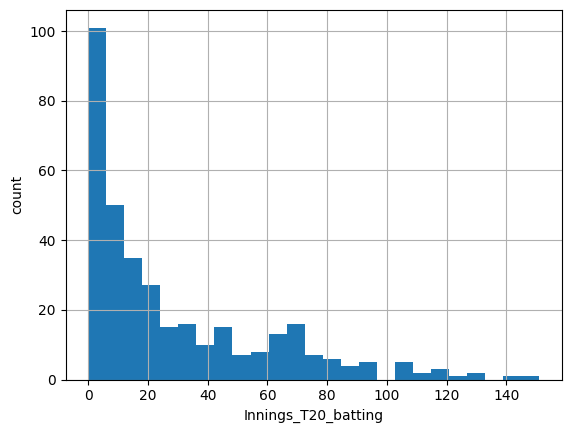

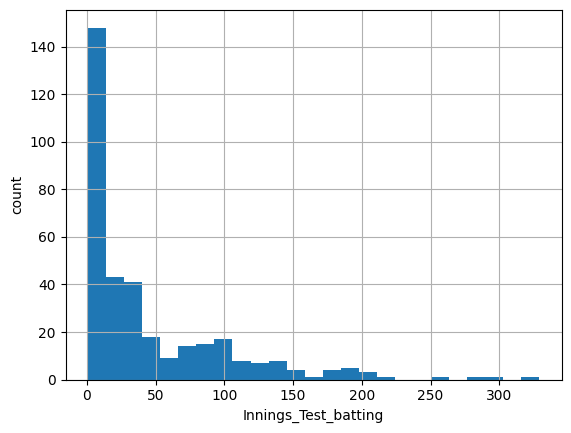

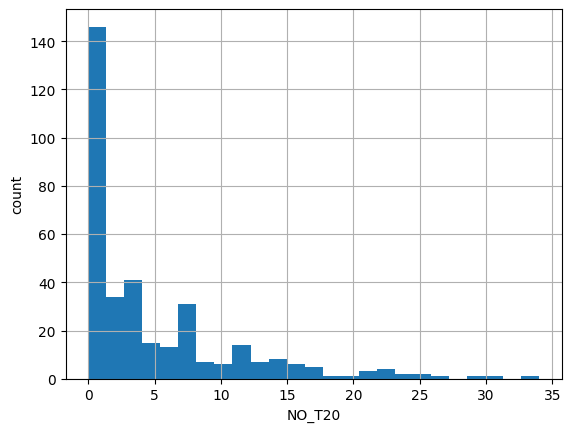

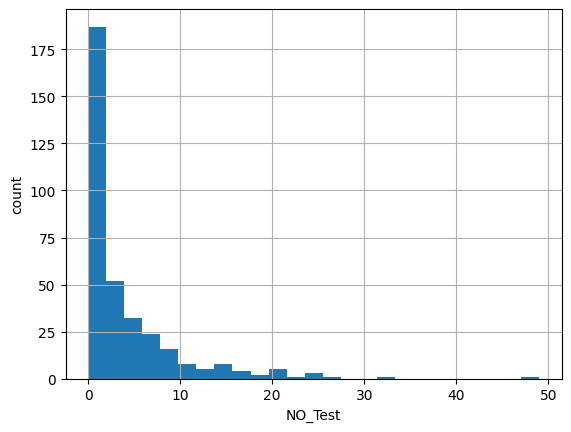

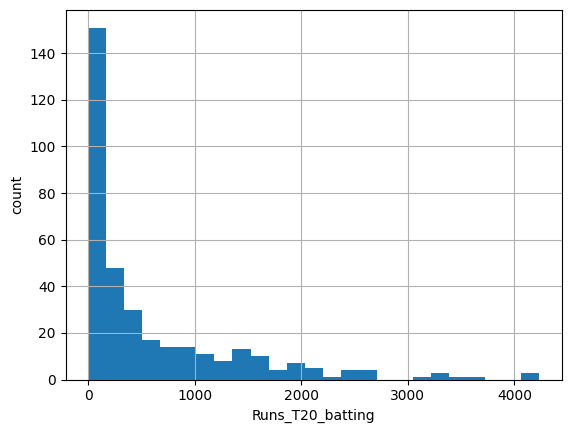

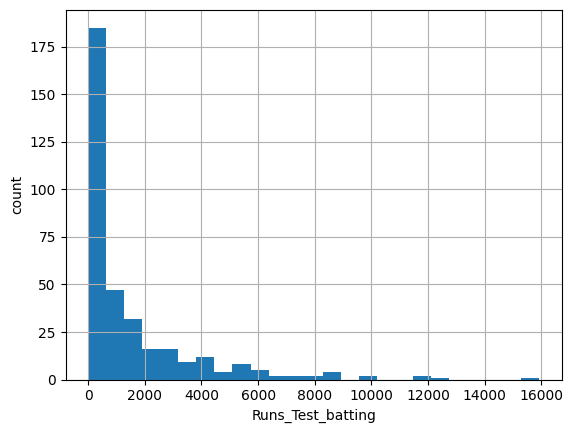

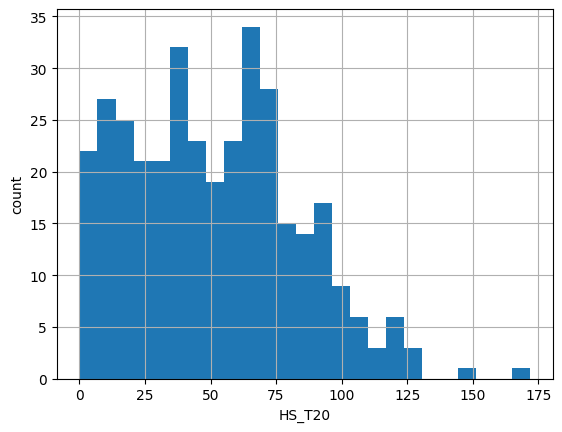

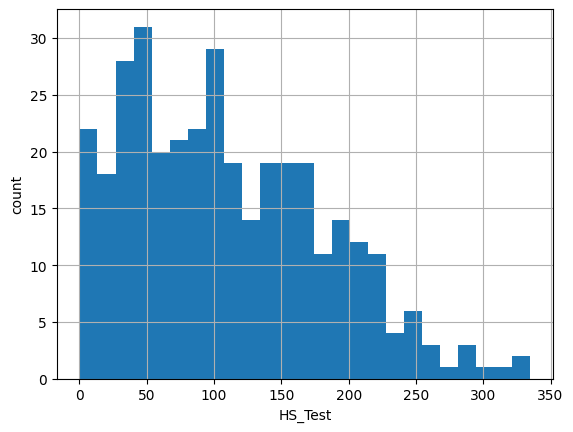

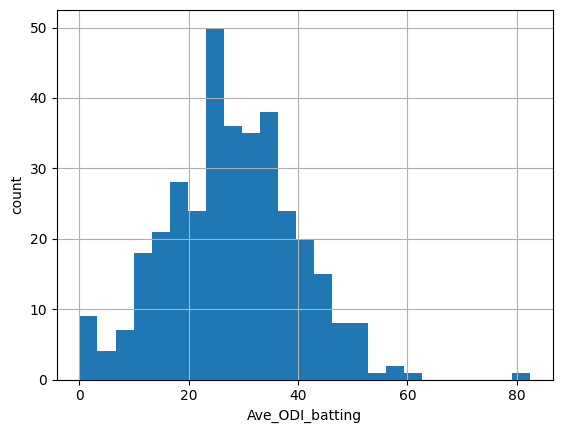

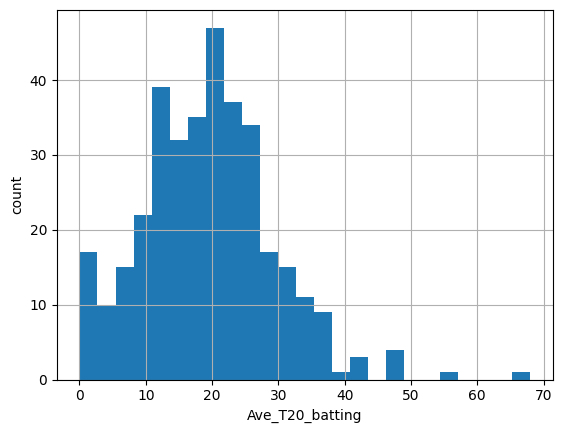

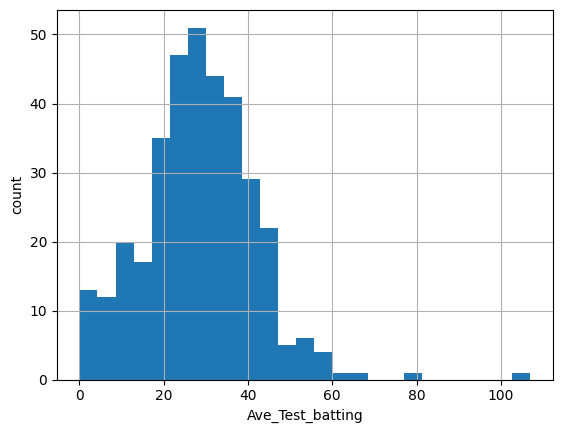

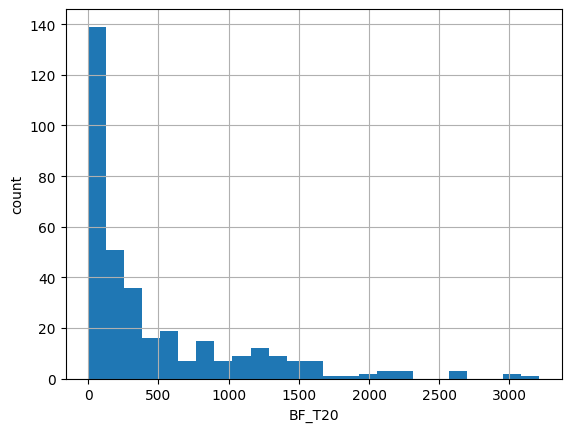

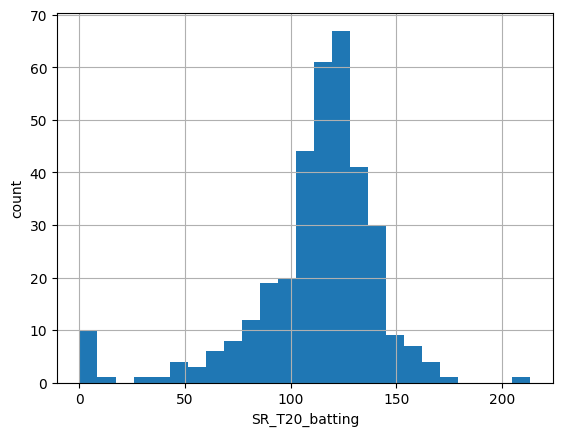

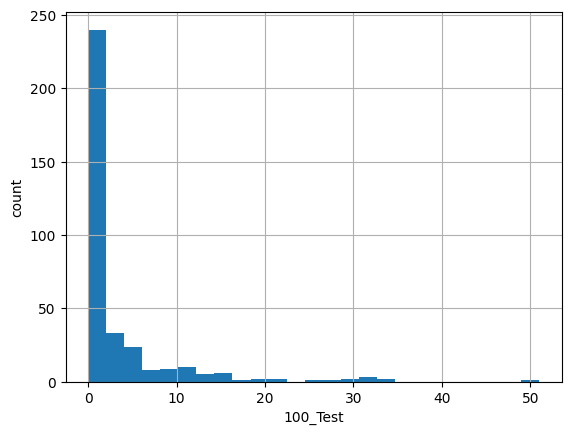

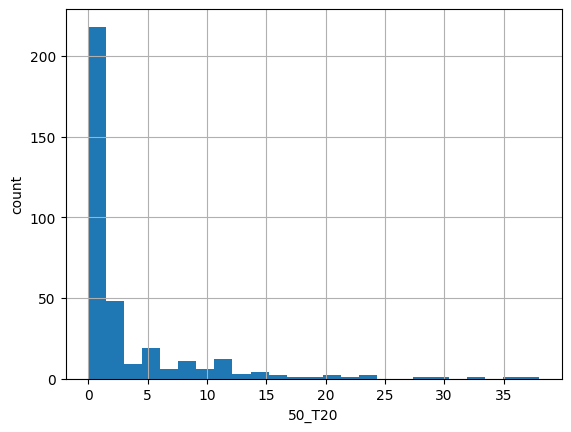

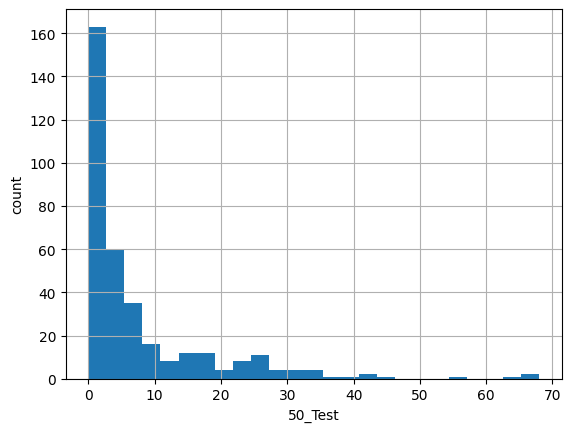

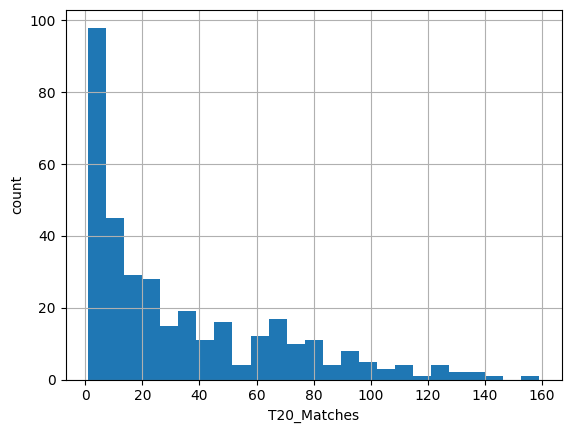

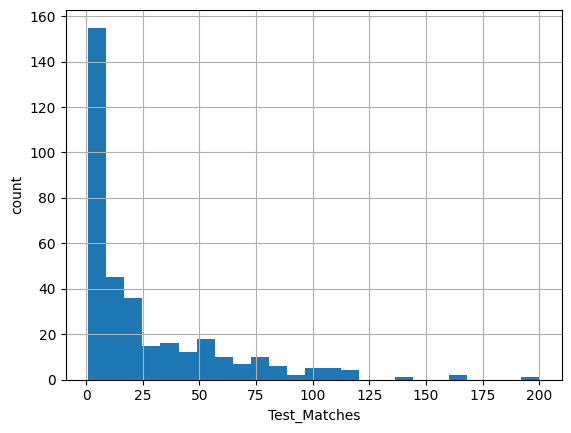

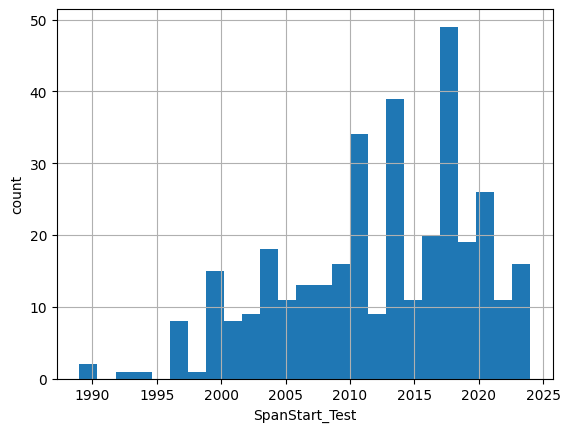

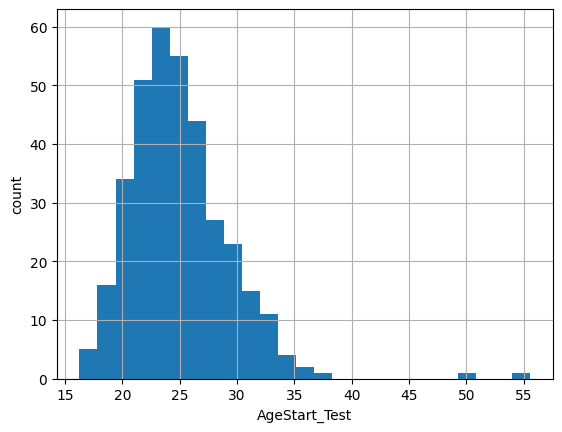

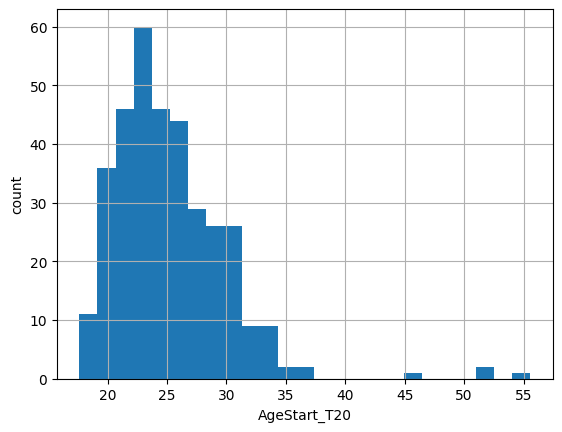

In [206]:
for feature in continuous_features:
    data = df_bat_odi.copy()
    
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

Continuous Features are slightly right skewed. Log transformation could be applied.
While discrete Features are Zero-inflated

#### Categorical Features

In [207]:
cat_features = [feature for feature in df_bat_odi.columns if feature not in num_features]
df_bat_odi[cat_features].head()

,Player Name,Batting Style,Playing Role,Country
0,A Athanaze,Left hand Bat,Batter,WI
1,A Balbirnie,Right hand Bat,Batter,IRE
2,A Dananjaya,Left hand Bat,Allrounder,SL
3,A Symonds,Right hand Bat,Allrounder,AUS
4,AB Barath,Right hand Bat,Batter,WI


In [208]:
for feature in cat_features:
    print('{}: {} categories'.format(feature, len(df_bat_odi[feature].unique())))

Player Name: 350 categories
Batting Style: 2 categories
Playing Role: 2 categories
Country: 12 categories


In [209]:
cat_features.remove('Player Name')

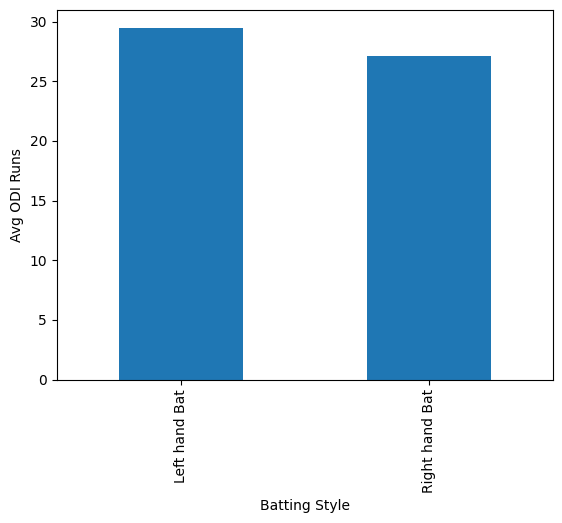

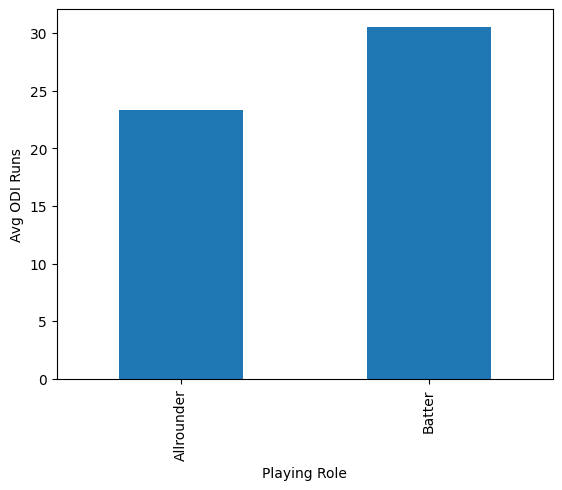

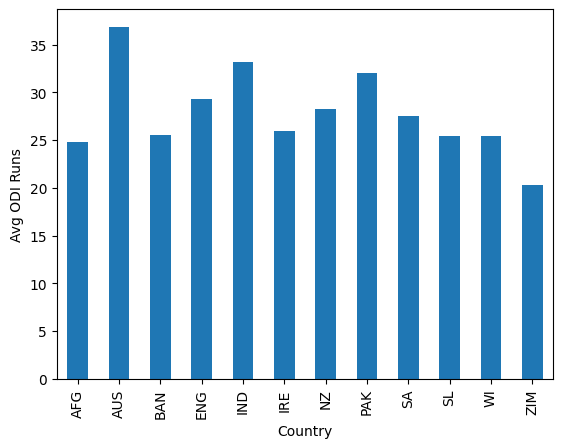

In [210]:
## relationship with Avg Runs

for feature in cat_features:
    data = df_bat_odi.copy()
    
    data.groupby(feature)['Ave_ODI_batting'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Avg ODI Runs')
    plt.show()

##### Observations:
1. Left handed batters have high Avgs
2. Batter have high averages in ODI as they bat ahead of Allrounders

#### Feature Engineering

In [211]:
dataset = df_bat_odi.copy()
dataset.head()

,Player Name,Batting Style,Playing Role,Innings_T20_batting,Innings_Test_batting,NO_T20,NO_Test,Runs_T20_batting,Runs_Test_batting,HS_T20,...,50_Test,0_T20,0_Test,T20_Matches,Test_Matches,Country,SpanStart_Test,SpanStart_T20,AgeStart_Test,AgeStart_T20
0,A Athanaze,Left hand Bat,Batter,1,13,1,0,6,310,6,...,1,0,1,1,7,WI,2023,2024,24.643836,25.643836
1,A Balbirnie,Right hand Bat,Batter,106,18,4,1,2392,401,83,...,4,6,3,110,9,IRE,2018,2015,27.586301,24.586301
2,A Dananjaya,Left hand Bat,Allrounder,16,10,8,2,65,135,11,...,0,2,3,33,6,SL,2018,2012,24.819178,18.819178
3,A Symonds,Right hand Bat,Allrounder,11,41,4,5,337,1462,85,...,10,2,4,14,26,AUS,2004,2005,29.080000,30.080000
4,AB Barath,Right hand Bat,Batter,2,28,0,0,23,657,15,...,4,0,2,2,15,WI,2009,2010,19.290411,20.290411


##### Converting Categorical features to Numerical features

In [212]:
for feature in cat_features:
    ordinal_labels = dataset.groupby(feature)['Ave_ODI_batting'].max().sort_values().index
    ordinal_dict = {k:i for i, k in enumerate(ordinal_labels, 0)}
    print(ordinal_dict)
    dataset[feature] = df_bat_odi[feature].map(ordinal_dict)

{'Left hand Bat': 0, 'Right hand Bat': 1}
{'Allrounder': 0, 'Batter': 1}
{'ZIM': 0, 'SL': 1, 'AFG': 2, 'AUS': 3, 'IRE': 4, 'WI': 5, 'SA': 6, 'NZ': 7, 'ENG': 8, 'PAK': 9, 'IND': 10, 'BAN': 11}


In [213]:
dataset.drop(['Player Name'], axis = 1, inplace = True)
dataset.head()

,Batting Style,Playing Role,Innings_T20_batting,Innings_Test_batting,NO_T20,NO_Test,Runs_T20_batting,Runs_Test_batting,HS_T20,HS_Test,...,50_Test,0_T20,0_Test,T20_Matches,Test_Matches,Country,SpanStart_Test,SpanStart_T20,AgeStart_Test,AgeStart_T20
0,0,1,1,13,1,0,6,310,6,82,...,1,0,1,1,7,5,2023,2024,24.643836,25.643836
1,1,1,106,18,4,1,2392,401,83,95,...,4,6,3,110,9,4,2018,2015,27.586301,24.586301
2,0,0,16,10,8,2,65,135,11,43,...,0,2,3,33,6,1,2018,2012,24.819178,18.819178
3,1,0,11,41,4,5,337,1462,85,162,...,10,2,4,14,26,3,2004,2005,29.080000,30.080000
4,1,1,2,28,0,0,23,657,15,104,...,4,0,2,2,15,5,2009,2010,19.290411,20.290411


In [214]:
dataset.to_csv('Data/Final/odi_bat_processed_data.csv', index = False)

#### Modelling

In [215]:
df = pd.read_csv('Data/Final/odi_bat_processed_data.csv')
df.head()

,Batting Style,Playing Role,Innings_T20_batting,Innings_Test_batting,NO_T20,NO_Test,Runs_T20_batting,Runs_Test_batting,HS_T20,HS_Test,...,50_Test,0_T20,0_Test,T20_Matches,Test_Matches,Country,SpanStart_Test,SpanStart_T20,AgeStart_Test,AgeStart_T20
0,0,1,1,13,1,0,6,310,6,82,...,1,0,1,1,7,5,2023,2024,24.643836,25.643836
1,1,1,106,18,4,1,2392,401,83,95,...,4,6,3,110,9,4,2018,2015,27.586301,24.586301
2,0,0,16,10,8,2,65,135,11,43,...,0,2,3,33,6,1,2018,2012,24.819178,18.819178
3,1,0,11,41,4,5,337,1462,85,162,...,10,2,4,14,26,3,2004,2005,29.080000,30.080000
4,1,1,2,28,0,0,23,657,15,104,...,4,0,2,2,15,5,2009,2010,19.290411,20.290411


In [216]:
X = df.drop('Ave_ODI_batting', axis = 1)

In [217]:
y = df['Ave_ODI_batting']

##### Dropping with correlation

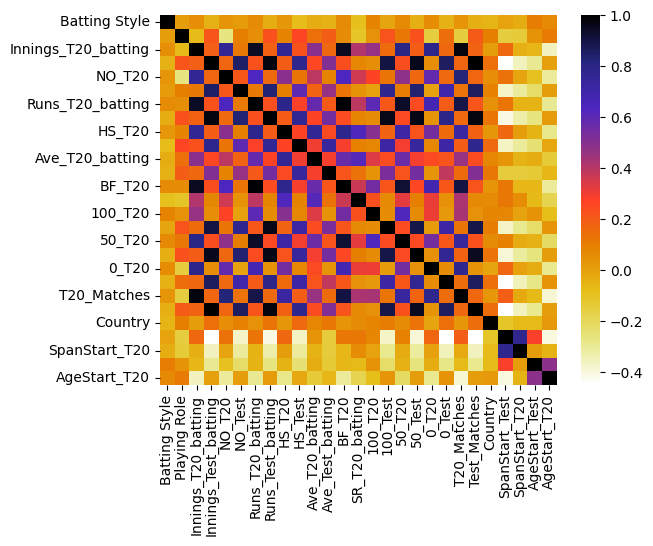

In [218]:
cor = X.corr()
sns.heatmap(cor, annot = False, cmap = plt.cm.CMRmap_r)
plt.show()

In [219]:
# Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

In [220]:
# Find features with correlation greater than 0.8
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.8)]

In [221]:
highly_correlated

['NO_Test',
 'Runs_T20_batting',
 'Runs_Test_batting',
 'BF_T20',
 '100_Test',
 '50_T20',
 '50_Test',
 '0_Test',
 'T20_Matches',
 'Test_Matches']

In [222]:
# Drop highly correlated features
X = X.drop(columns=highly_correlated)

In [223]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [225]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [226]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [227]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [228]:
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

Random Forest Mean Squared Error: 68.90403899142858
Random Forest R^2 Score: 0.34899594729798866


In [229]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [230]:
scores = cross_val_score(rf_model, X_train, y_train, cv=cv)
print(np.mean(scores))

0.36841360169470894


##### Inferencing with Shap

In [231]:
import shap

In [232]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

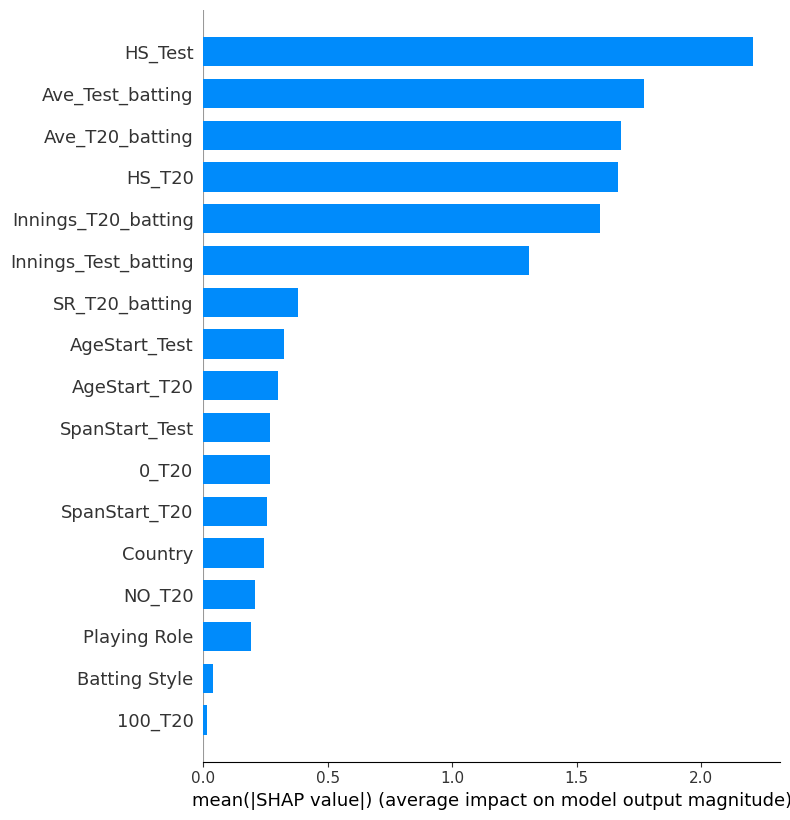

In [233]:
# Plot summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

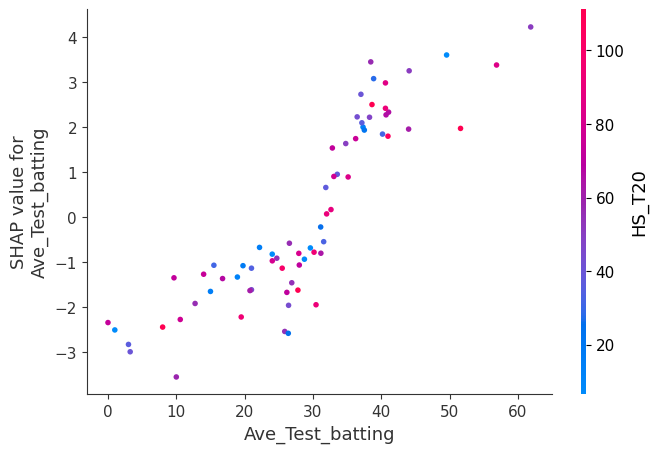

In [234]:
# Plot SHAP dependence plot for a specific feature
shap.dependence_plot("Ave_Test_batting", shap_values, X_test) 

##### Hyperparameter Tuning

In [235]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Random Hyperparameter Grid

In [236]:
from sklearn.model_selection import RandomizedSearchCV

In [237]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ["sqrt", "log2", None]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [238]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [239]:
rf = RandomForestRegressor()

In [240]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [241]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [242]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [243]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    # Evaluate the model
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(mse))
    print('R2 = {:0.4f}'.format(r2))
    
    return r2

In [244]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 68.9040 degrees.
R2 = 0.3490


In [245]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 67.7399 degrees.
R2 = 0.3600


In [246]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 3.15%.


Grid Search CV

In [247]:
from sklearn.model_selection import GridSearchCV

In [248]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [249]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [250]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [251]:

grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [252]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 67.3127 degrees.
R2 = 0.3640


In [253]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 4.31%.


## Test Batting Average

In [254]:
test_cols = [column for column in df_bat.columns if "Test" in column and 'Ave_Test_batting' != column] 

In [255]:
test_cols

['Innings_Test_batting',
 'NO_Test',
 'Runs_Test_batting',
 'HS_Test',
 '100_Test',
 '50_Test',
 '0_Test',
 'Test_Matches',
 'SpanStart_Test',
 'AgeStart_Test']

In [256]:
# Dropping Bowling stats
df_bat_test = df_bat.drop(columns=test_cols)

In [257]:
df_bat_test.columns

Index(['Player Name', 'Born', 'Batting Style', 'Playing Role',
       'Innings_ODI_batting', 'Innings_T20_batting', 'NO_ODI', 'NO_T20',
       'Runs_ODI_batting', 'Runs_T20_batting', 'HS_ODI', 'HS_T20',
       'Ave_ODI_batting', 'Ave_T20_batting', 'Ave_Test_batting', 'BF_ODI',
       'BF_T20', 'SR_ODI_batting', 'SR_T20_batting', '100_ODI', '100_T20',
       '50_ODI', '50_T20', '0_ODI', '0_T20', 'ODI_Matches', 'T20_Matches',
       'Country', 'SpanStart_ODI', 'SpanStart_T20', 'AgeStart_ODI',
       'AgeStart_T20'],
      dtype='object')

In [258]:
df_bat_test.drop(columns=["Born"], inplace=True)

In [259]:
df_bat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          350 non-null    object 
 1   Batting Style        350 non-null    object 
 2   Playing Role         350 non-null    object 
 3   Innings_ODI_batting  350 non-null    int64  
 4   Innings_T20_batting  350 non-null    int64  
 5   NO_ODI               350 non-null    int64  
 6   NO_T20               350 non-null    int64  
 7   Runs_ODI_batting     350 non-null    int64  
 8   Runs_T20_batting     350 non-null    int64  
 9   HS_ODI               350 non-null    int64  
 10  HS_T20               350 non-null    int64  
 11  Ave_ODI_batting      350 non-null    float64
 12  Ave_T20_batting      350 non-null    float64
 13  Ave_Test_batting     350 non-null    float64
 14  BF_ODI               350 non-null    int64  
 15  BF_T20               350 non-null    int

In [260]:
num_features = [feature for feature in df_bat_test.columns if df_bat_test[feature].dtype != 'O']
print(num_features)
df_bat_test[num_features].head()

['Innings_ODI_batting', 'Innings_T20_batting', 'NO_ODI', 'NO_T20', 'Runs_ODI_batting', 'Runs_T20_batting', 'HS_ODI', 'HS_T20', 'Ave_ODI_batting', 'Ave_T20_batting', 'Ave_Test_batting', 'BF_ODI', 'BF_T20', 'SR_ODI_batting', 'SR_T20_batting', '100_ODI', '100_T20', '50_ODI', '50_T20', '0_ODI', '0_T20', 'ODI_Matches', 'T20_Matches', 'SpanStart_ODI', 'SpanStart_T20', 'AgeStart_ODI', 'AgeStart_T20']


,Innings_ODI_batting,Innings_T20_batting,NO_ODI,NO_T20,Runs_ODI_batting,Runs_T20_batting,HS_ODI,HS_T20,Ave_ODI_batting,Ave_T20_batting,...,50_ODI,50_T20,0_ODI,0_T20,ODI_Matches,T20_Matches,SpanStart_ODI,SpanStart_T20,AgeStart_ODI,AgeStart_T20
0,10,1,0,1,288,6,66,6,28.80,0.00,...,2,0,0,0,10,1,2023,2024,24.643836,25.643836
1,102,106,8,4,3008,2392,145,83,32.00,23.45,...,16,12,7,6,108,110,2010,2015,19.586301,24.586301
2,30,16,6,8,291,65,50,11,12.12,8.12,...,1,0,3,2,40,33,2012,2012,18.819178,18.819178
3,161,11,33,4,5088,337,156,85,39.75,48.14,...,30,2,15,2,198,14,1998,2005,23.080000,30.080000
4,14,2,1,0,394,23,113,15,30.30,11.50,...,1,0,2,0,14,2,2010,2010,20.290411,20.290411


#### Discrete Features

In [261]:
discrete_features = [feature for feature in num_features if len(df_bat_test[feature].unique()) < 25]
print(discrete_features)

['100_ODI', '100_T20', '0_ODI', '0_T20', 'SpanStart_T20']


100_ODI
0     0.497143
1     0.137143
2     0.068571
3     0.051429
4     0.037143
5     0.051429
6     0.034286
7     0.014286
8     0.011429
9     0.011429
10    0.002857
11    0.025714
12    0.008571
13    0.002857
14    0.002857
16    0.008571
17    0.005714
18    0.002857
19    0.002857
21    0.008571
22    0.005714
31    0.002857
49    0.002857
50    0.002857
Name: Ave_Test_batting, dtype: float64
100_ODI
0     174
1      48
2      24
3      18
5      18
4      13
6      12
11      9
7       5
9       4
8       4
12      3
16      3
21      3
22      2
17      2
19      1
13      1
18      1
10      1
14      1
31      1
49      1
50      1
Name: count, dtype: int64


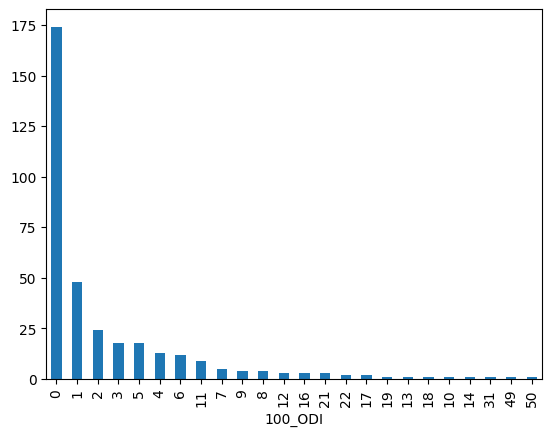

100_T20
0    0.922857
1    0.048571
2    0.014286
3    0.005714
4    0.002857
5    0.005714
Name: Ave_Test_batting, dtype: float64
100_T20
0    323
1     17
2      5
3      2
5      2
4      1
Name: count, dtype: int64


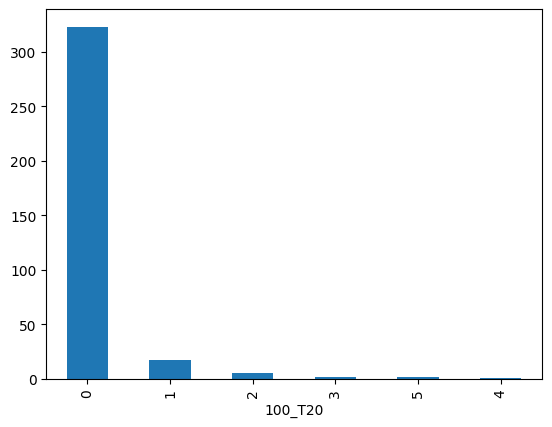

0_ODI
0     0.185714
1     0.131429
2     0.125714
3     0.117143
4     0.071429
5     0.068571
6     0.060000
7     0.042857
8     0.040000
9     0.028571
10    0.020000
11    0.031429
12    0.011429
13    0.008571
14    0.014286
15    0.011429
16    0.011429
17    0.002857
19    0.005714
20    0.005714
22    0.005714
Name: Ave_Test_batting, dtype: float64
0_ODI
0     65
1     46
2     44
3     41
4     25
5     24
6     21
7     15
8     14
11    11
9     10
10     7
14     5
16     4
15     4
12     4
13     3
20     2
22     2
19     2
17     1
Name: count, dtype: int64


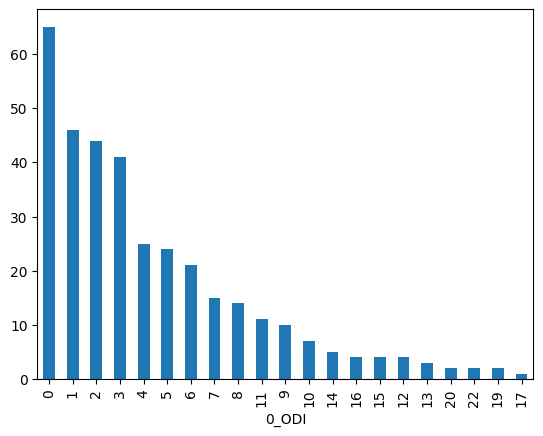

0_T20
0     0.337143
1     0.185714
2     0.174286
3     0.071429
4     0.062857
5     0.048571
6     0.042857
7     0.031429
8     0.014286
9     0.008571
10    0.005714
11    0.002857
12    0.005714
13    0.008571
Name: Ave_Test_batting, dtype: float64
0_T20
0     118
1      65
2      61
3      25
4      22
5      17
6      15
7      11
8       5
9       3
13      3
12      2
10      2
11      1
Name: count, dtype: int64


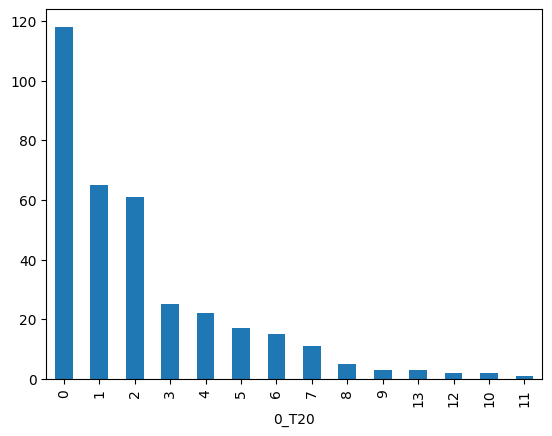

SpanStart_T20
2005    0.051429
2006    0.117143
2007    0.082857
2008    0.048571
2009    0.062857
2010    0.082857
2011    0.065714
2012    0.057143
2013    0.034286
2014    0.034286
2015    0.040000
2016    0.054286
2017    0.045714
2018    0.034286
2019    0.060000
2020    0.020000
2021    0.048571
2022    0.037143
2023    0.011429
2024    0.011429
Name: Ave_Test_batting, dtype: float64
SpanStart_T20
2006    41
2010    29
2007    29
2011    23
2009    22
2019    21
2012    20
2016    19
2005    18
2008    17
2021    17
2017    16
2015    14
2022    13
2014    12
2018    12
2013    12
2020     7
2024     4
2023     4
Name: count, dtype: int64


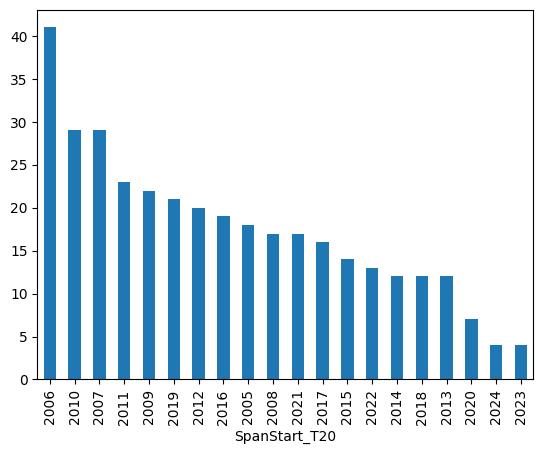

In [262]:
for feature in discrete_features:
    data = df_bat_test.copy() 
    print(data.groupby(feature)['Ave_Test_batting'].count() / len(data))
    print(data[feature].value_counts())
    data[feature].value_counts().plot.bar()
    plt.show()

100_ODI
0     0.405485
1     0.153111
2     0.070056
3     0.058456
4     0.040705
5     0.065078
6     0.040769
7     0.019742
8     0.014508
9     0.015034
10    0.003284
11    0.031813
12    0.012018
13    0.005531
14    0.002522
16    0.011282
17    0.006882
18    0.002956
19    0.004613
21    0.012619
22    0.008609
31    0.004573
49    0.005410
50    0.004945
Name: Ave_Test_batting, dtype: float64


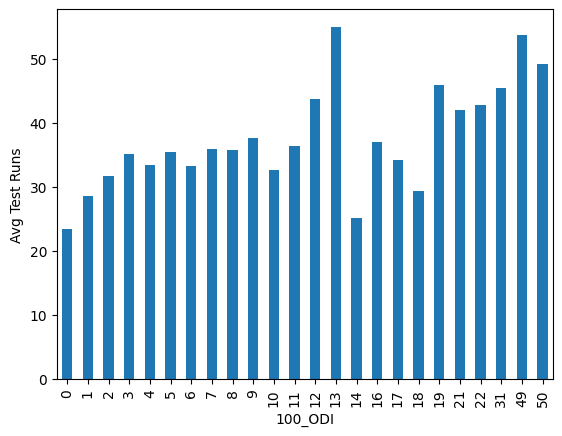

100_T20
0    0.912448
1    0.057768
2    0.016416
3    0.005367
4    0.000805
5    0.007196
Name: Ave_Test_batting, dtype: float64


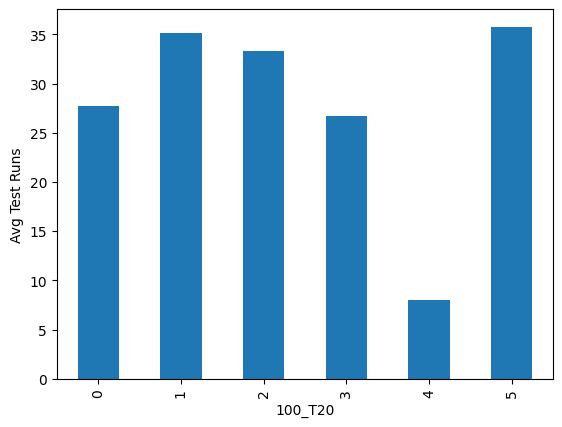

0_ODI
0     0.171239
1     0.107739
2     0.118889
3     0.119335
4     0.068286
5     0.073418
6     0.059754
7     0.040744
8     0.043717
9     0.037065
10    0.024148
11    0.037823
12    0.011534
13    0.010853
14    0.015518
15    0.013819
16    0.015271
17    0.004583
19    0.007511
20    0.009298
22    0.009457
Name: Ave_Test_batting, dtype: float64


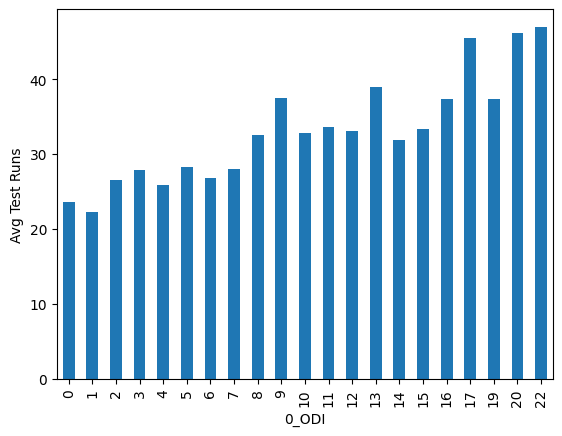

0_T20
0     0.335490
1     0.186882
2     0.168592
3     0.067113
4     0.067605
5     0.046753
6     0.045923
7     0.035297
8     0.012464
9     0.006937
10    0.007726
11    0.002736
12    0.009765
13    0.006717
Name: Ave_Test_batting, dtype: float64


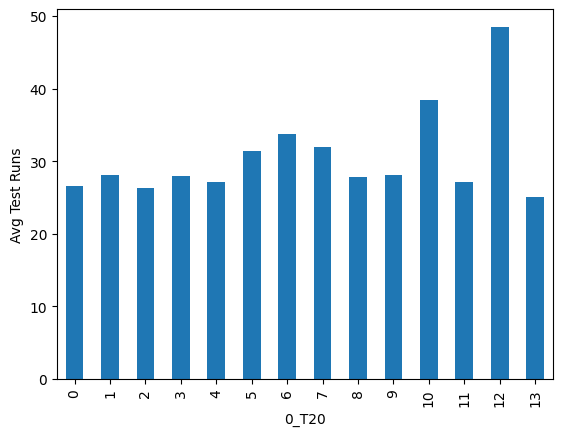

SpanStart_T20
2005    0.069056
2006    0.130751
2007    0.095489
2008    0.039205
2009    0.060111
2010    0.083188
2011    0.063529
2012    0.049348
2013    0.030216
2014    0.027007
2015    0.037178
2016    0.060784
2017    0.047756
2018    0.034074
2019    0.060052
2020    0.016432
2021    0.047589
2022    0.031795
2023    0.004768
2024    0.011672
Name: Ave_Test_batting, dtype: float64


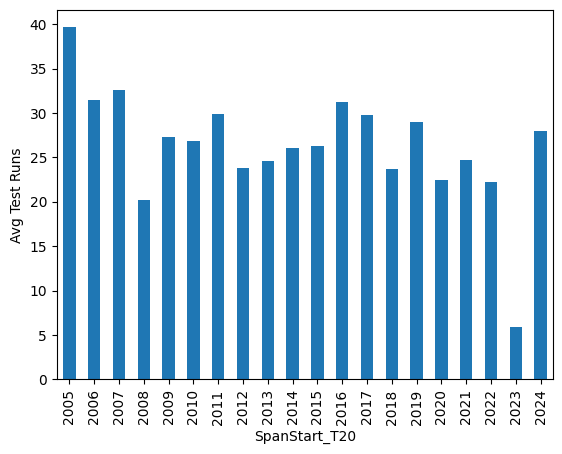

In [263]:
for feature in discrete_features:
    data = df_bat_test.copy()
    
    print(data.groupby(feature)['Ave_Test_batting'].sum() / data['Ave_Test_batting'].sum())
    data.groupby(feature)['Ave_Test_batting'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Avg Test Runs')
    plt.show()

#### Continuous Features

In [264]:
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print(continuous_features)

['Innings_ODI_batting', 'Innings_T20_batting', 'NO_ODI', 'NO_T20', 'Runs_ODI_batting', 'Runs_T20_batting', 'HS_ODI', 'HS_T20', 'Ave_ODI_batting', 'Ave_T20_batting', 'Ave_Test_batting', 'BF_ODI', 'BF_T20', 'SR_ODI_batting', 'SR_T20_batting', '50_ODI', '50_T20', 'ODI_Matches', 'T20_Matches', 'SpanStart_ODI', 'AgeStart_ODI', 'AgeStart_T20']


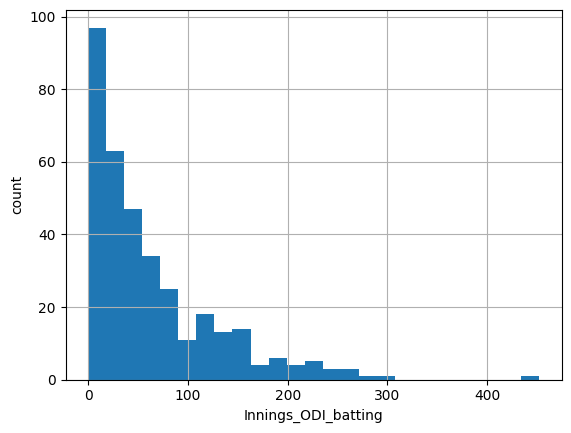

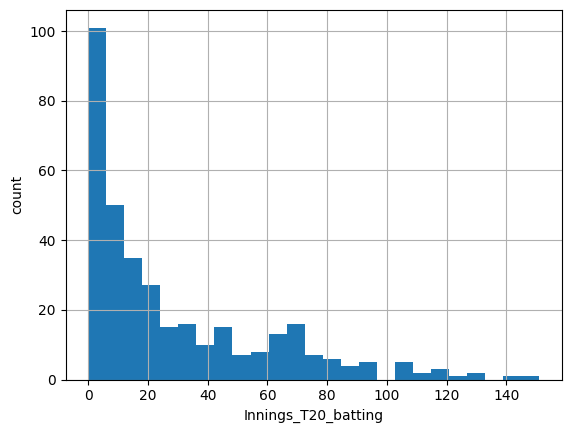

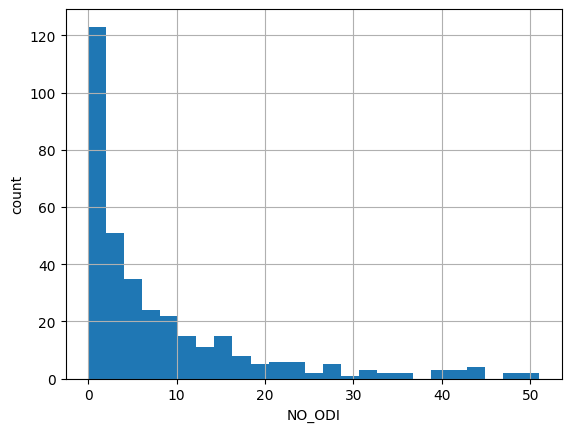

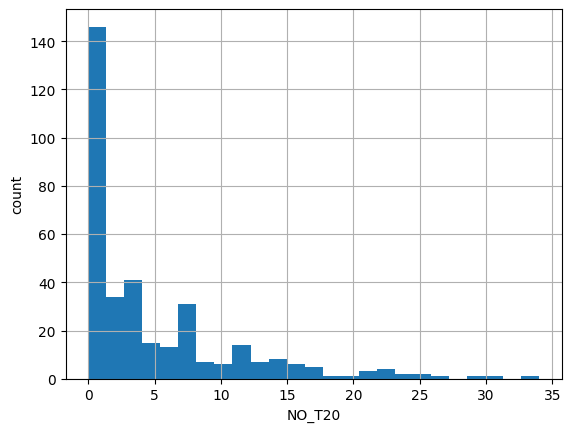

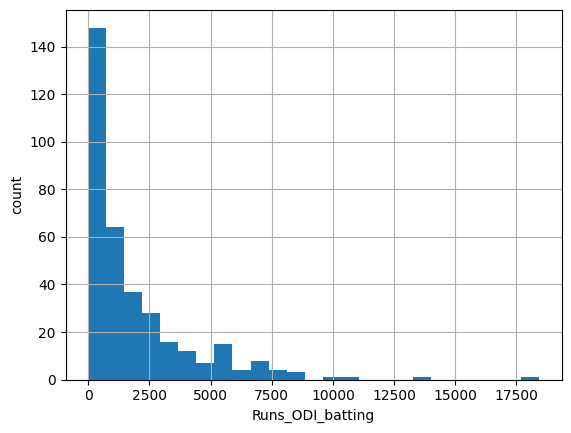

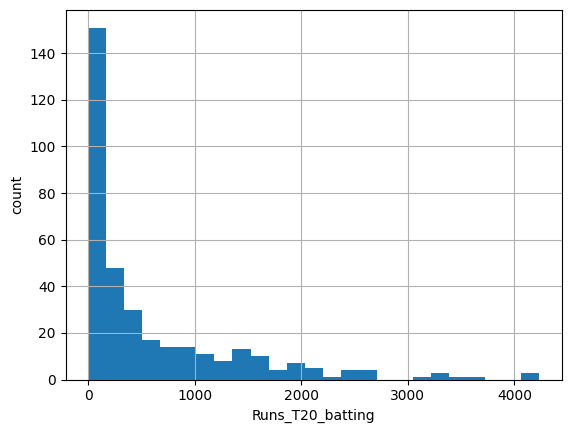

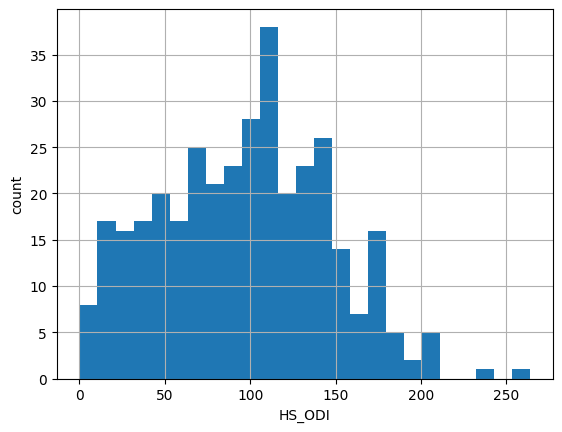

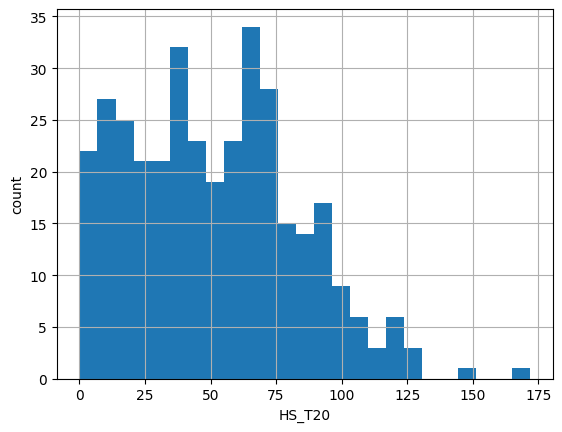

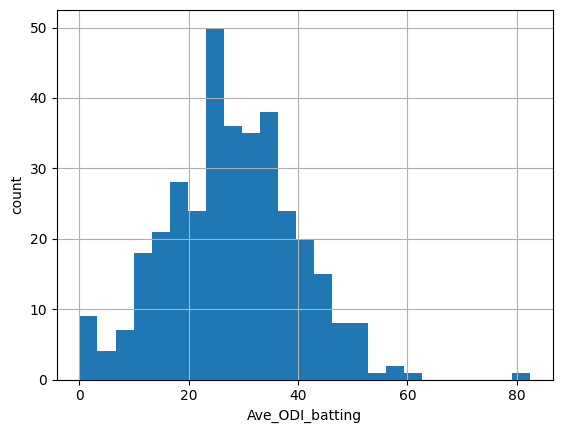

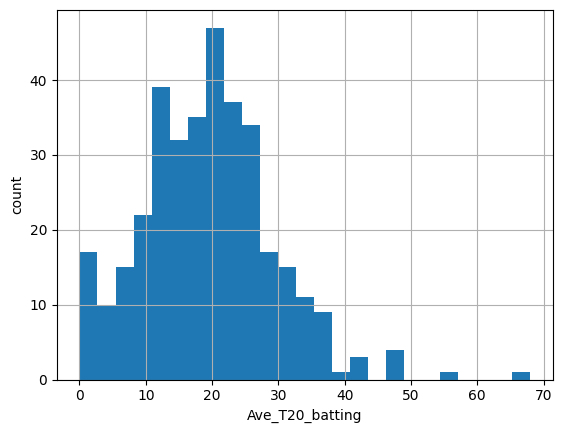

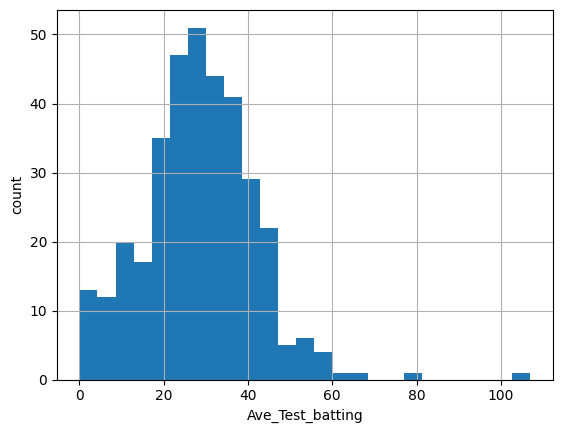

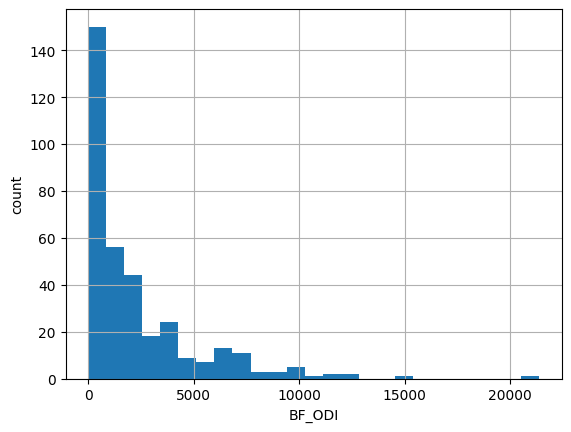

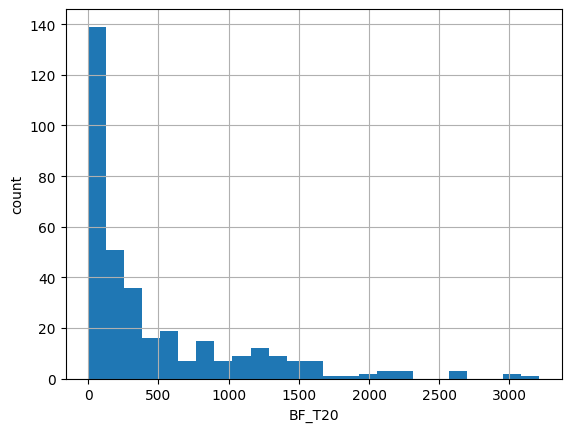

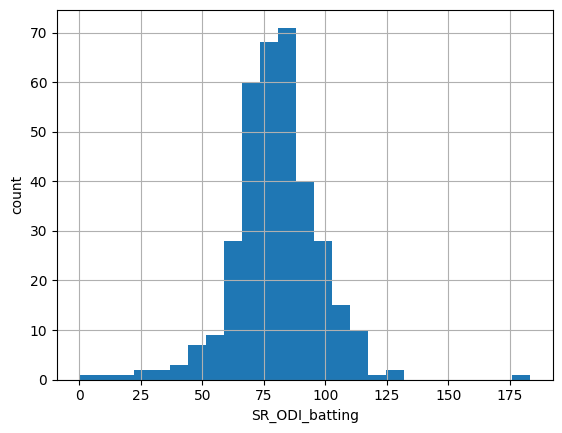

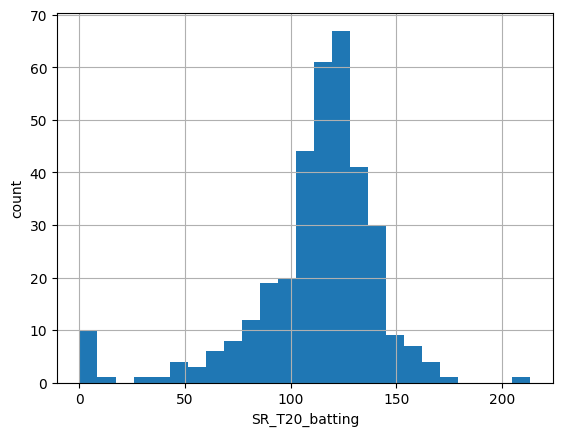

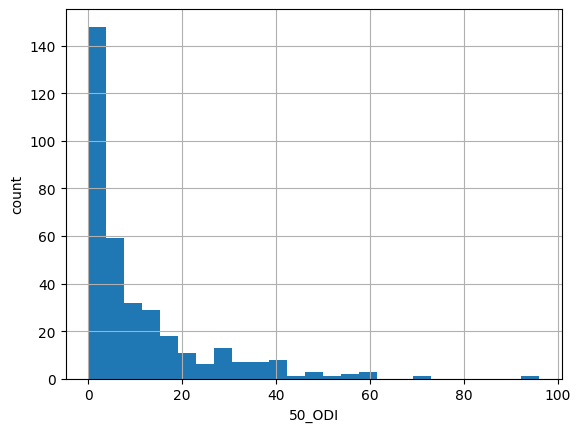

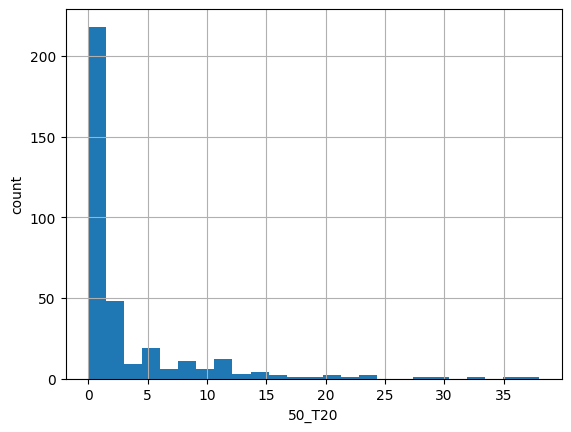

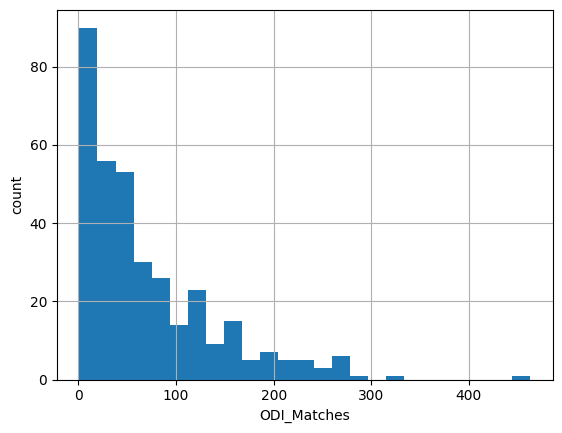

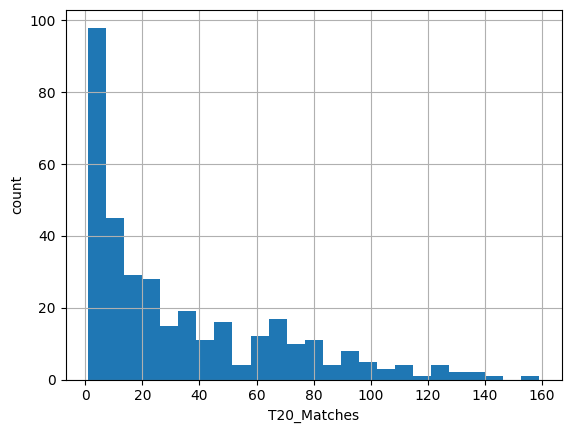

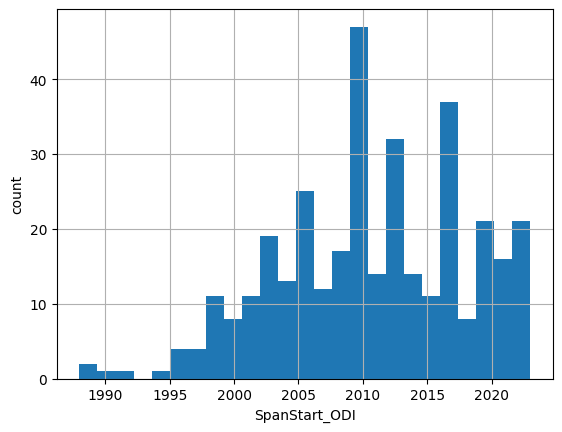

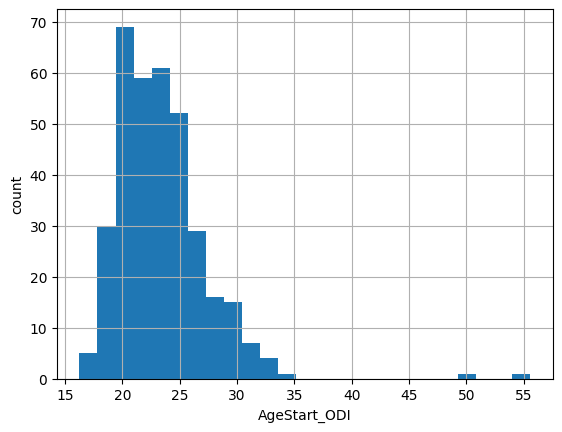

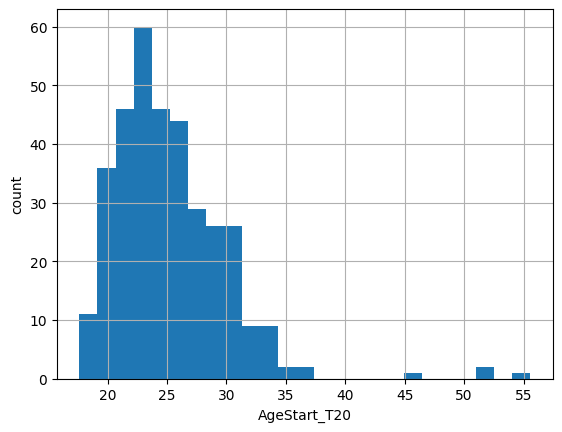

In [265]:
for feature in continuous_features:
    data = df_bat_test.copy()
    
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

#### Categorical Features

In [266]:
cat_features = [feature for feature in df_bat_test.columns if feature not in num_features]
df_bat_test[cat_features].head()

,Player Name,Batting Style,Playing Role,Country
0,A Athanaze,Left hand Bat,Batter,WI
1,A Balbirnie,Right hand Bat,Batter,IRE
2,A Dananjaya,Left hand Bat,Allrounder,SL
3,A Symonds,Right hand Bat,Allrounder,AUS
4,AB Barath,Right hand Bat,Batter,WI


In [267]:
for feature in cat_features:
    print('{}: {} categories'.format(feature, len(df_bat_test[feature].unique())))

Player Name: 350 categories
Batting Style: 2 categories
Playing Role: 2 categories
Country: 12 categories


In [268]:
cat_features.remove('Player Name')

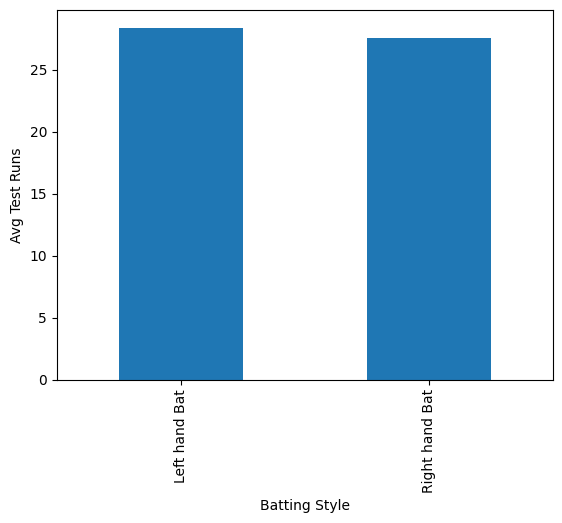

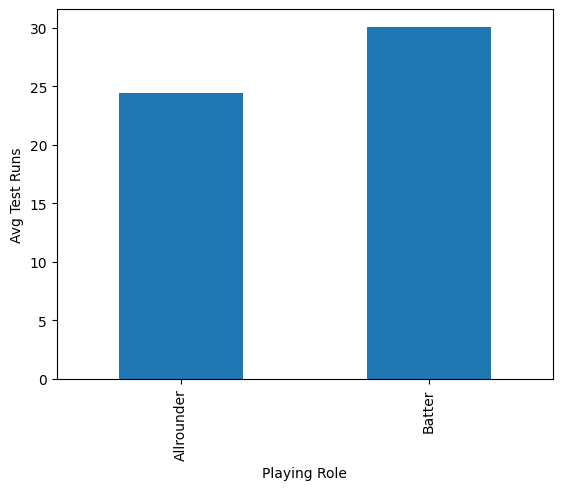

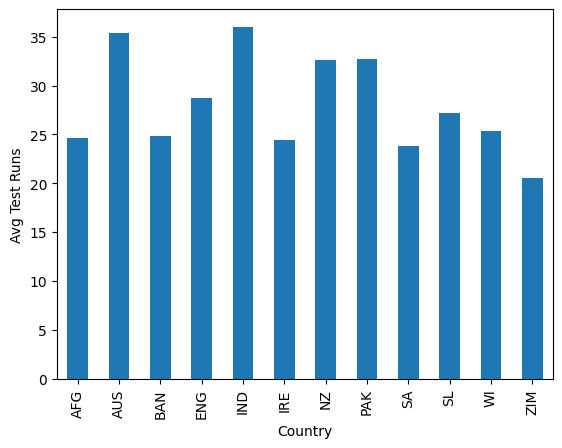

In [269]:
## relationship with Avg Runs

for feature in cat_features:
    data = df_bat_test.copy()
    
    data.groupby(feature)['Ave_Test_batting'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Avg Test Runs')
    plt.show()

#### Feature Engineering

In [270]:
dataset = df_bat_test.copy()
dataset.head()

,Player Name,Batting Style,Playing Role,Innings_ODI_batting,Innings_T20_batting,NO_ODI,NO_T20,Runs_ODI_batting,Runs_T20_batting,HS_ODI,...,50_T20,0_ODI,0_T20,ODI_Matches,T20_Matches,Country,SpanStart_ODI,SpanStart_T20,AgeStart_ODI,AgeStart_T20
0,A Athanaze,Left hand Bat,Batter,10,1,0,1,288,6,66,...,0,0,0,10,1,WI,2023,2024,24.643836,25.643836
1,A Balbirnie,Right hand Bat,Batter,102,106,8,4,3008,2392,145,...,12,7,6,108,110,IRE,2010,2015,19.586301,24.586301
2,A Dananjaya,Left hand Bat,Allrounder,30,16,6,8,291,65,50,...,0,3,2,40,33,SL,2012,2012,18.819178,18.819178
3,A Symonds,Right hand Bat,Allrounder,161,11,33,4,5088,337,156,...,2,15,2,198,14,AUS,1998,2005,23.080000,30.080000
4,AB Barath,Right hand Bat,Batter,14,2,1,0,394,23,113,...,0,2,0,14,2,WI,2010,2010,20.290411,20.290411


##### Converting Categorical features to Numerical features

In [271]:
for feature in cat_features:
    ordinal_labels = dataset.groupby(feature)['Ave_Test_batting'].max().sort_values().index
    ordinal_dict = {k:i for i, k in enumerate(ordinal_labels, 0)}
    print(ordinal_dict)
    dataset[feature] = df_bat_odi[feature].map(ordinal_dict)

{'Right hand Bat': 0, 'Left hand Bat': 1}
{'Batter': 0, 'Allrounder': 1}
{'BAN': 0, 'SA': 1, 'ZIM': 2, 'AFG': 3, 'WI': 4, 'IRE': 5, 'PAK': 6, 'NZ': 7, 'ENG': 8, 'AUS': 9, 'IND': 10, 'SL': 11}


In [272]:
dataset.drop(['Player Name'], axis = 1, inplace = True)
dataset.head()

,Batting Style,Playing Role,Innings_ODI_batting,Innings_T20_batting,NO_ODI,NO_T20,Runs_ODI_batting,Runs_T20_batting,HS_ODI,HS_T20,...,50_T20,0_ODI,0_T20,ODI_Matches,T20_Matches,Country,SpanStart_ODI,SpanStart_T20,AgeStart_ODI,AgeStart_T20
0,1,0,10,1,0,1,288,6,66,6,...,0,0,0,10,1,4,2023,2024,24.643836,25.643836
1,0,0,102,106,8,4,3008,2392,145,83,...,12,7,6,108,110,5,2010,2015,19.586301,24.586301
2,1,1,30,16,6,8,291,65,50,11,...,0,3,2,40,33,11,2012,2012,18.819178,18.819178
3,0,1,161,11,33,4,5088,337,156,85,...,2,15,2,198,14,9,1998,2005,23.080000,30.080000
4,0,0,14,2,1,0,394,23,113,15,...,0,2,0,14,2,4,2010,2010,20.290411,20.290411


In [273]:
dataset.to_csv('Data/Final/test_bat_processed_data.csv', index = False)

#### Modelling

In [274]:
df = pd.read_csv('Data/Final/test_bat_processed_data.csv')
df.head()

,Batting Style,Playing Role,Innings_ODI_batting,Innings_T20_batting,NO_ODI,NO_T20,Runs_ODI_batting,Runs_T20_batting,HS_ODI,HS_T20,...,50_T20,0_ODI,0_T20,ODI_Matches,T20_Matches,Country,SpanStart_ODI,SpanStart_T20,AgeStart_ODI,AgeStart_T20
0,1,0,10,1,0,1,288,6,66,6,...,0,0,0,10,1,4,2023,2024,24.643836,25.643836
1,0,0,102,106,8,4,3008,2392,145,83,...,12,7,6,108,110,5,2010,2015,19.586301,24.586301
2,1,1,30,16,6,8,291,65,50,11,...,0,3,2,40,33,11,2012,2012,18.819178,18.819178
3,0,1,161,11,33,4,5088,337,156,85,...,2,15,2,198,14,9,1998,2005,23.080000,30.080000
4,0,0,14,2,1,0,394,23,113,15,...,0,2,0,14,2,4,2010,2010,20.290411,20.290411


In [275]:
X = df.drop('Ave_Test_batting', axis = 1)

In [276]:
y = df['Ave_Test_batting']

##### Dropping with correlation

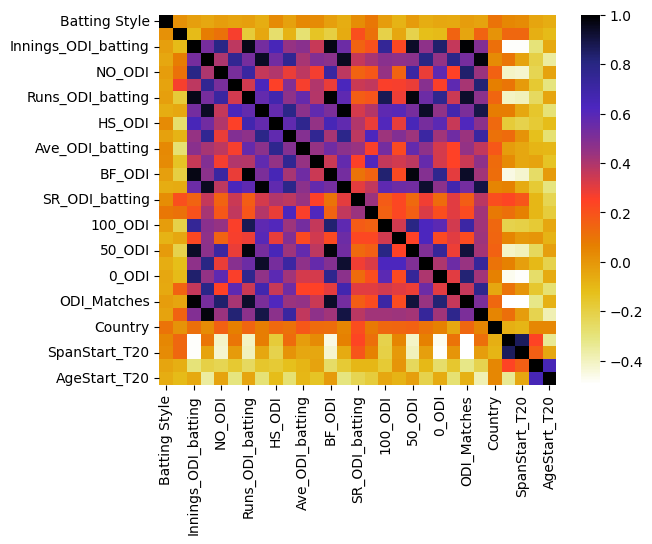

In [277]:
cor = X.corr()
sns.heatmap(cor, annot = False, cmap = plt.cm.CMRmap_r)
plt.show()

In [278]:
# Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

In [279]:
# Find features with correlation greater than 0.8
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.8)]

In [280]:
highly_correlated

['Runs_ODI_batting',
 'Runs_T20_batting',
 'BF_ODI',
 'BF_T20',
 '100_ODI',
 '50_ODI',
 '50_T20',
 '0_ODI',
 'ODI_Matches',
 'T20_Matches',
 'SpanStart_T20']

In [281]:
# Drop highly correlated features
X = X.drop(columns=highly_correlated)

In [282]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [284]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [285]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [286]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [287]:
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

Random Forest Mean Squared Error: 129.3218895492143
Random Forest R^2 Score: 0.18586621728346087


In [288]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [289]:
scores = cross_val_score(rf_model, X_train, y_train, cv=cv)
print(np.mean(scores))

0.2113485502701786


##### Inferencing with Shap

In [290]:
import shap

In [291]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

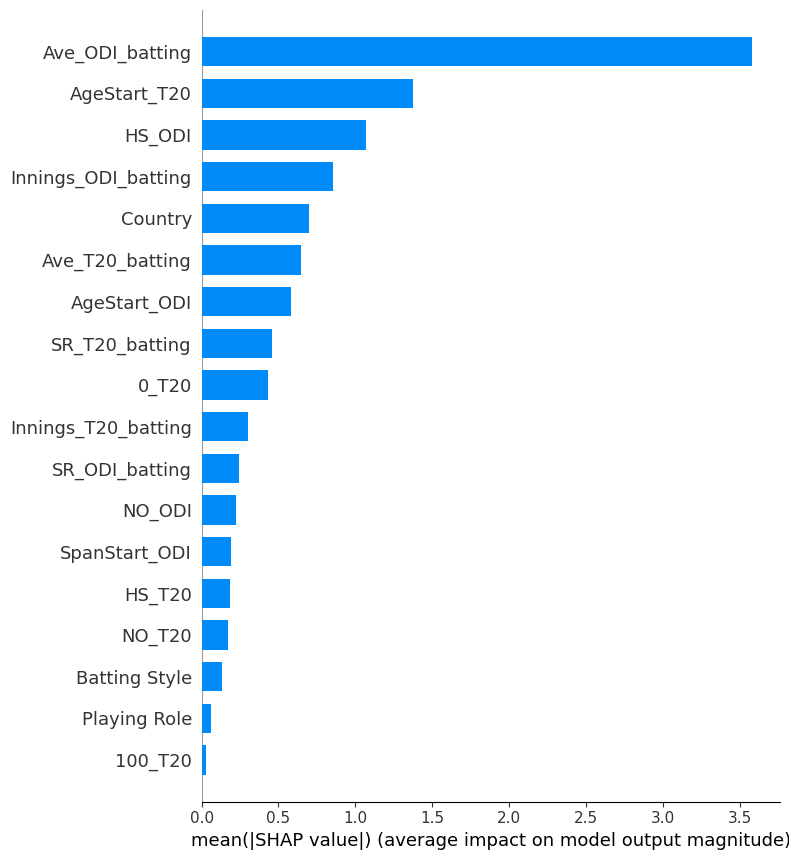

In [292]:
# Plot summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

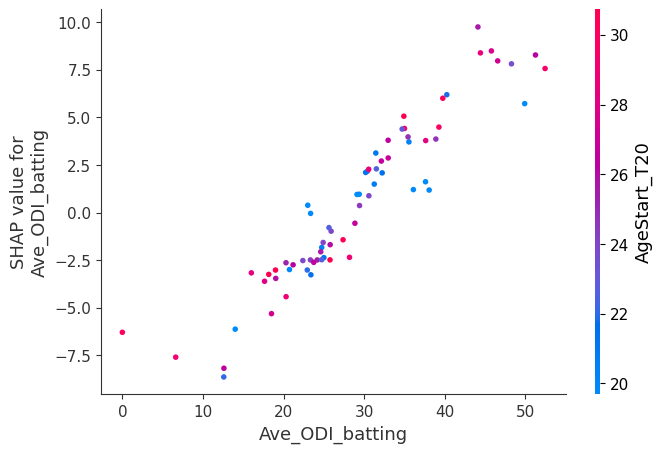

In [293]:
# Plot SHAP dependence plot for a specific feature
shap.dependence_plot("Ave_ODI_batting", shap_values, X_test) 

##### Hyperparameter Tuning

In [294]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Random Hyperparameter Grid

In [295]:
from sklearn.model_selection import RandomizedSearchCV

In [296]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ["sqrt", "log2", None]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [297]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [298]:
rf = RandomForestRegressor()

In [299]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [300]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [301]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [302]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    # Evaluate the model
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(mse))
    print('R2 = {:0.4f}'.format(r2))
    
    return r2

In [303]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 129.3219 degrees.
R2 = 0.1859


In [304]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 123.2076 degrees.
R2 = 0.2244


In [305]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 20.71%.


Grid Search CV

In [306]:
from sklearn.model_selection import GridSearchCV

In [307]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [308]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [309]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV]

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [310]:

grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [311]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 125.1466 degrees.
R2 = 0.2122


## T20 Batting Average

In [312]:
t20_cols = [column for column in df_bat.columns if "T20" in column and 'Ave_T20_batting' != column] 

In [313]:
t20_cols

['Innings_T20_batting',
 'NO_T20',
 'Runs_T20_batting',
 'HS_T20',
 'BF_T20',
 'SR_T20_batting',
 '100_T20',
 '50_T20',
 '0_T20',
 'T20_Matches',
 'SpanStart_T20',
 'AgeStart_T20']

In [314]:
# Dropping Bowling stats
df_bat_t20 = df_bat.drop(columns=t20_cols)

In [315]:
df_bat_t20.columns

Index(['Player Name', 'Born', 'Batting Style', 'Playing Role',
       'Innings_ODI_batting', 'Innings_Test_batting', 'NO_ODI', 'NO_Test',
       'Runs_ODI_batting', 'Runs_Test_batting', 'HS_ODI', 'HS_Test',
       'Ave_ODI_batting', 'Ave_T20_batting', 'Ave_Test_batting', 'BF_ODI',
       'SR_ODI_batting', '100_ODI', '100_Test', '50_ODI', '50_Test', '0_ODI',
       '0_Test', 'ODI_Matches', 'Test_Matches', 'Country', 'SpanStart_ODI',
       'SpanStart_Test', 'AgeStart_ODI', 'AgeStart_Test'],
      dtype='object')

In [316]:
df_bat_t20.drop(columns=["Born"], inplace=True)

In [317]:
df_bat_t20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player Name           350 non-null    object 
 1   Batting Style         350 non-null    object 
 2   Playing Role          350 non-null    object 
 3   Innings_ODI_batting   350 non-null    int64  
 4   Innings_Test_batting  350 non-null    int64  
 5   NO_ODI                350 non-null    int64  
 6   NO_Test               350 non-null    int64  
 7   Runs_ODI_batting      350 non-null    int64  
 8   Runs_Test_batting     350 non-null    int64  
 9   HS_ODI                350 non-null    int64  
 10  HS_Test               350 non-null    int64  
 11  Ave_ODI_batting       350 non-null    float64
 12  Ave_T20_batting       350 non-null    float64
 13  Ave_Test_batting      350 non-null    float64
 14  BF_ODI                350 non-null    int64  
 15  SR_ODI_batting        3

In [318]:
num_features = [feature for feature in df_bat_t20.columns if df_bat_t20[feature].dtype != 'O']
print(num_features)
df_bat_t20[num_features].head()

['Innings_ODI_batting', 'Innings_Test_batting', 'NO_ODI', 'NO_Test', 'Runs_ODI_batting', 'Runs_Test_batting', 'HS_ODI', 'HS_Test', 'Ave_ODI_batting', 'Ave_T20_batting', 'Ave_Test_batting', 'BF_ODI', 'SR_ODI_batting', '100_ODI', '100_Test', '50_ODI', '50_Test', '0_ODI', '0_Test', 'ODI_Matches', 'Test_Matches', 'SpanStart_ODI', 'SpanStart_Test', 'AgeStart_ODI', 'AgeStart_Test']


,Innings_ODI_batting,Innings_Test_batting,NO_ODI,NO_Test,Runs_ODI_batting,Runs_Test_batting,HS_ODI,HS_Test,Ave_ODI_batting,Ave_T20_batting,...,50_ODI,50_Test,0_ODI,0_Test,ODI_Matches,Test_Matches,SpanStart_ODI,SpanStart_Test,AgeStart_ODI,AgeStart_Test
0,10,13,0,0,288,310,66,82,28.80,0.00,...,2,1,0,1,10,7,2023,2023,24.643836,24.643836
1,102,18,8,1,3008,401,145,95,32.00,23.45,...,16,4,7,3,108,9,2010,2018,19.586301,27.586301
2,30,10,6,2,291,135,50,43,12.12,8.12,...,1,0,3,3,40,6,2012,2018,18.819178,24.819178
3,161,41,33,5,5088,1462,156,162,39.75,48.14,...,30,10,15,4,198,26,1998,2004,23.080000,29.080000
4,14,28,1,0,394,657,113,104,30.30,11.50,...,1,4,2,2,14,15,2010,2009,20.290411,19.290411


#### Discrete Features

In [319]:
discrete_features = [feature for feature in num_features if len(df_bat_t20[feature].unique()) < 25]
print(discrete_features)

['100_ODI', '0_ODI', '0_Test']


100_ODI
0     0.497143
1     0.137143
2     0.068571
3     0.051429
4     0.037143
5     0.051429
6     0.034286
7     0.014286
8     0.011429
9     0.011429
10    0.002857
11    0.025714
12    0.008571
13    0.002857
14    0.002857
16    0.008571
17    0.005714
18    0.002857
19    0.002857
21    0.008571
22    0.005714
31    0.002857
49    0.002857
50    0.002857
Name: Ave_T20_batting, dtype: float64
100_ODI
0     174
1      48
2      24
3      18
5      18
4      13
6      12
11      9
7       5
9       4
8       4
12      3
16      3
21      3
22      2
17      2
19      1
13      1
18      1
10      1
14      1
31      1
49      1
50      1
Name: count, dtype: int64


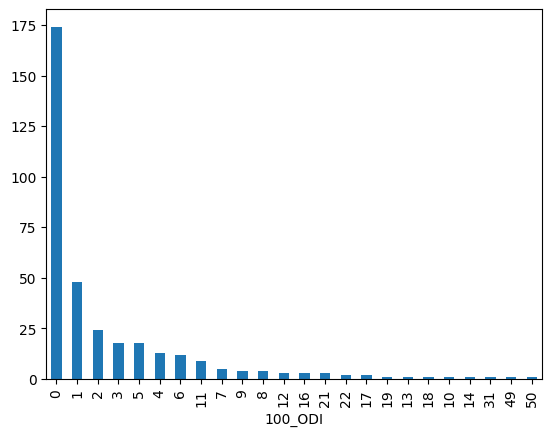

0_ODI
0     0.185714
1     0.131429
2     0.125714
3     0.117143
4     0.071429
5     0.068571
6     0.060000
7     0.042857
8     0.040000
9     0.028571
10    0.020000
11    0.031429
12    0.011429
13    0.008571
14    0.014286
15    0.011429
16    0.011429
17    0.002857
19    0.005714
20    0.005714
22    0.005714
Name: Ave_T20_batting, dtype: float64
0_ODI
0     65
1     46
2     44
3     41
4     25
5     24
6     21
7     15
8     14
11    11
9     10
10     7
14     5
16     4
15     4
12     4
13     3
20     2
22     2
19     2
17     1
Name: count, dtype: int64


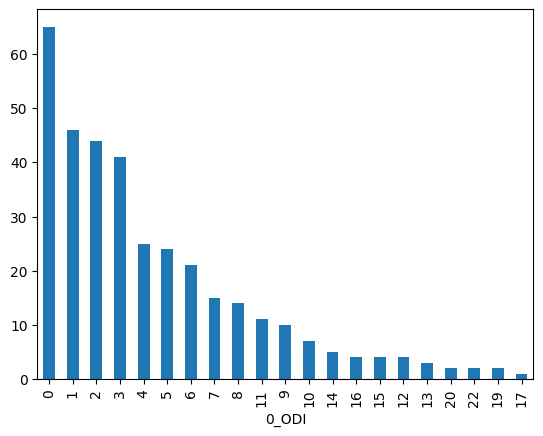

0_Test
0     0.220000
1     0.185714
2     0.125714
3     0.097143
4     0.074286
5     0.040000
6     0.040000
7     0.034286
8     0.037143
9     0.028571
10    0.022857
11    0.017143
12    0.020000
13    0.011429
14    0.025714
15    0.011429
17    0.002857
19    0.002857
22    0.002857
Name: Ave_T20_batting, dtype: float64
0_Test
0     77
1     65
2     44
3     34
4     26
5     14
6     14
8     13
7     12
9     10
14     9
10     8
12     7
11     6
13     4
15     4
17     1
22     1
19     1
Name: count, dtype: int64


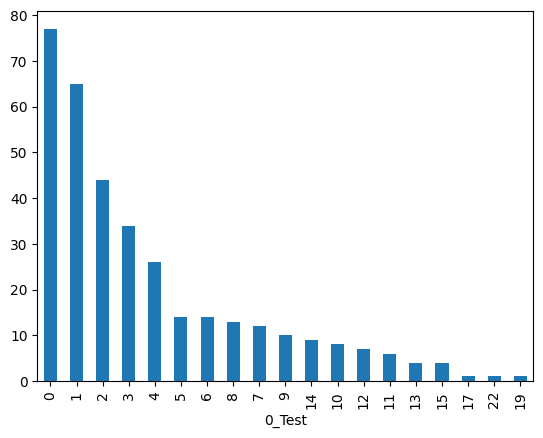

In [320]:
for feature in discrete_features:
    data = df_bat_t20.copy() 
    print(data.groupby(feature)['Ave_T20_batting'].count() / len(data))
    print(data[feature].value_counts())
    data[feature].value_counts().plot.bar()
    plt.show()

100_ODI
0     0.387849
1     0.147188
2     0.063646
3     0.068670
4     0.044413
5     0.063543
6     0.053257
7     0.019006
8     0.014247
9     0.012170
10    0.004325
11    0.031283
12    0.015409
13    0.004938
14    0.003998
16    0.012415
17    0.009186
18    0.004698
19    0.006059
21    0.011200
22    0.009100
31    0.004733
49    0.001477
50    0.007190
Name: Ave_T20_batting, dtype: float64


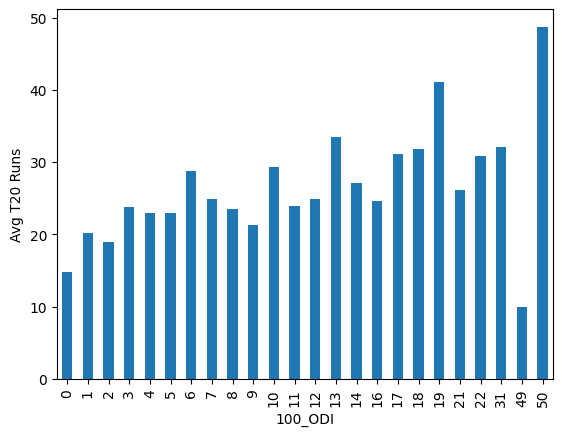

0_ODI
0     0.141609
1     0.111670
2     0.120658
3     0.107678
4     0.084431
5     0.073789
6     0.066183
7     0.047904
8     0.035206
9     0.035125
10    0.025721
11    0.038293
12    0.014724
13    0.012907
14    0.019417
15    0.018662
16    0.021684
17    0.004100
19    0.007549
20    0.006743
22    0.005948
Name: Ave_T20_batting, dtype: float64


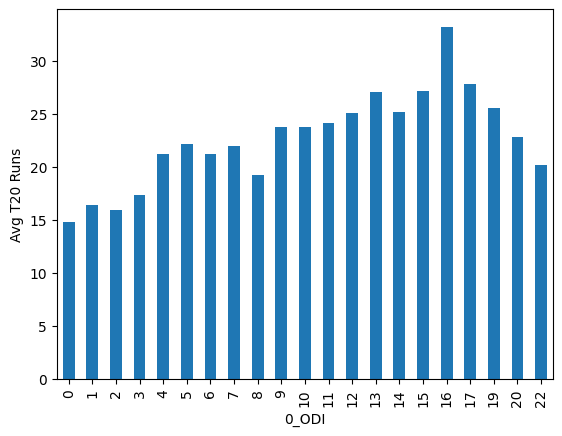

0_Test
0     0.199757
1     0.166194
2     0.123012
3     0.089675
4     0.067926
5     0.047520
6     0.038574
7     0.045540
8     0.041233
9     0.030419
10    0.027499
11    0.020961
12    0.034009
13    0.013851
14    0.033424
15    0.012000
17    0.004405
19    0.003264
22    0.000738
Name: Ave_T20_batting, dtype: float64


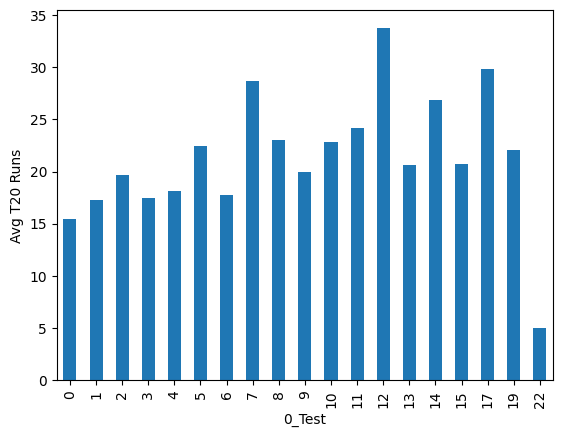

In [321]:
for feature in discrete_features:
    data = df_bat_t20.copy()
    
    print(data.groupby(feature)['Ave_T20_batting'].sum() / data['Ave_T20_batting'].sum())
    data.groupby(feature)['Ave_T20_batting'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Avg T20 Runs')
    plt.show()

#### Continuous Features

In [322]:
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print(continuous_features)

['Innings_ODI_batting', 'Innings_Test_batting', 'NO_ODI', 'NO_Test', 'Runs_ODI_batting', 'Runs_Test_batting', 'HS_ODI', 'HS_Test', 'Ave_ODI_batting', 'Ave_T20_batting', 'Ave_Test_batting', 'BF_ODI', 'SR_ODI_batting', '100_Test', '50_ODI', '50_Test', 'ODI_Matches', 'Test_Matches', 'SpanStart_ODI', 'SpanStart_Test', 'AgeStart_ODI', 'AgeStart_Test']


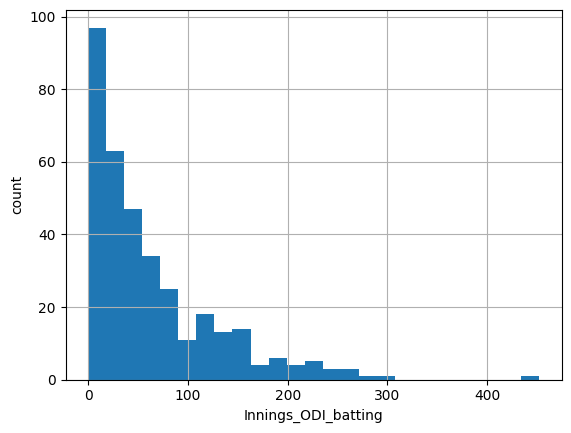

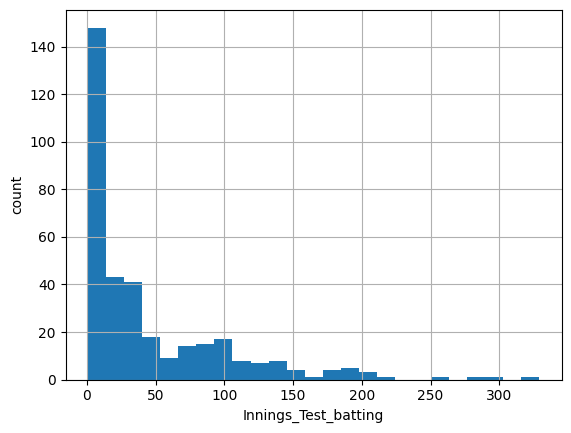

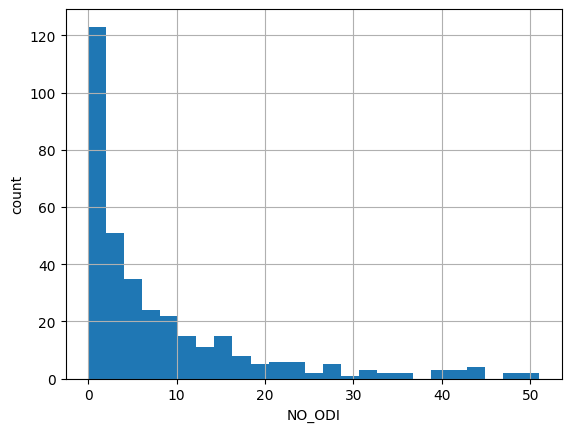

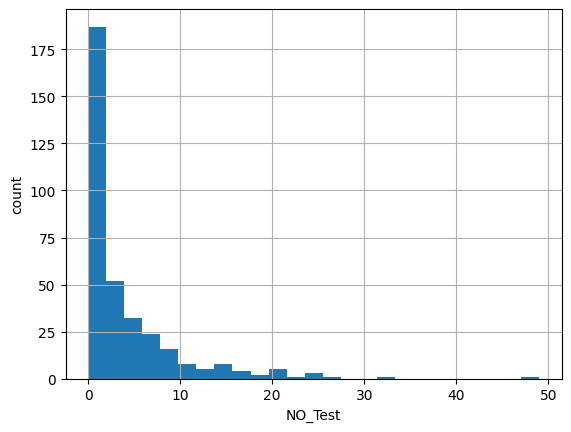

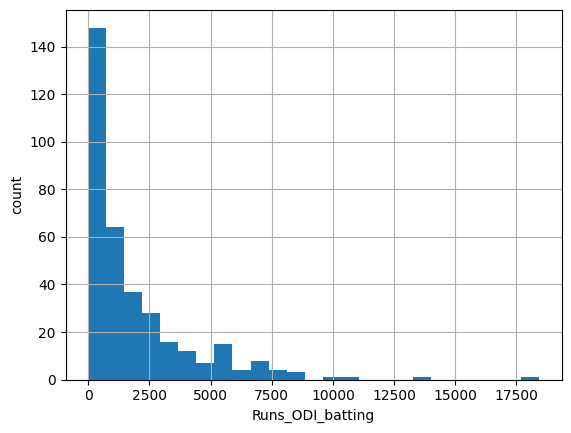

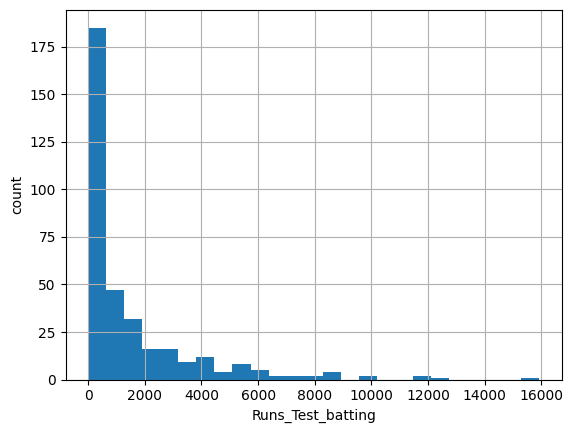

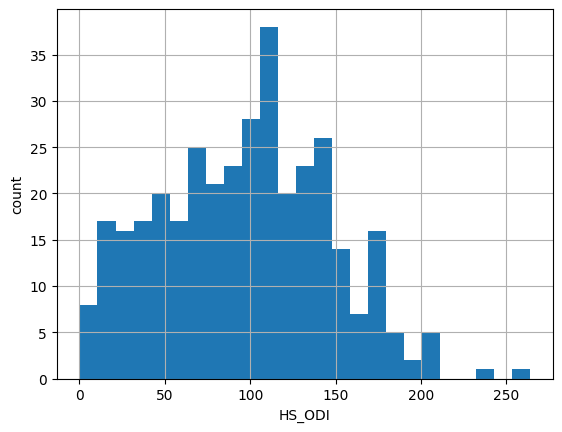

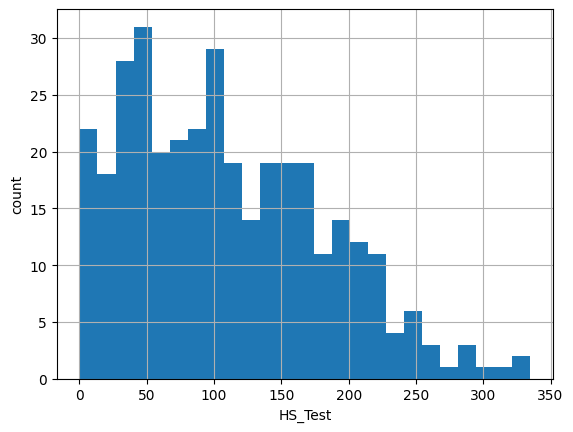

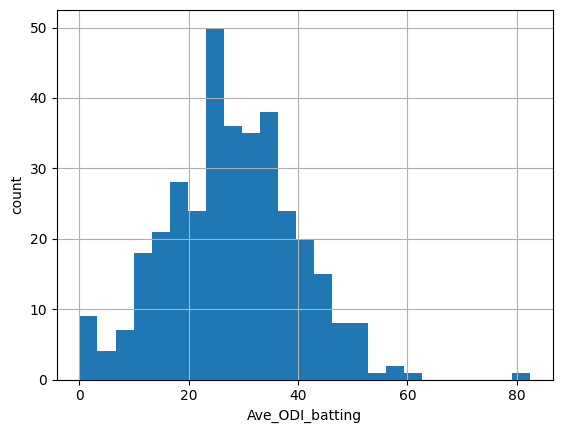

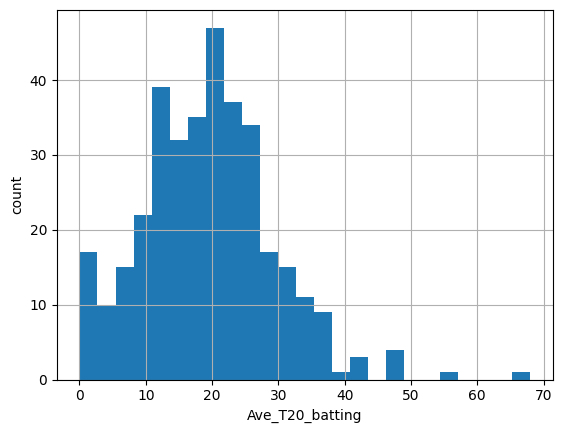

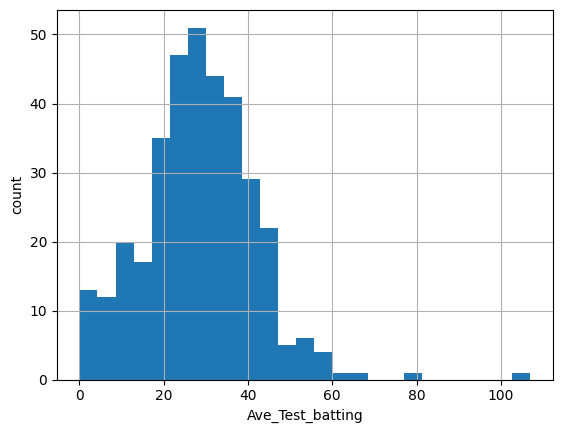

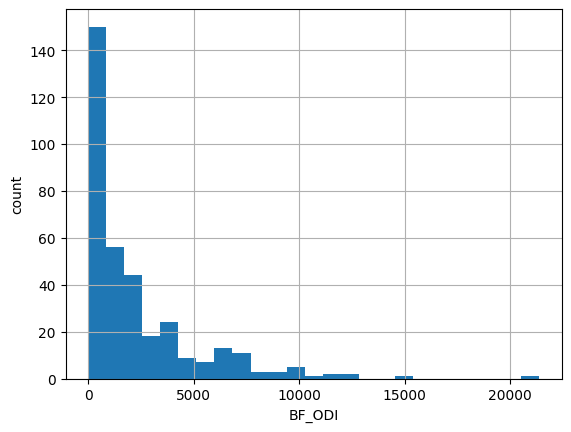

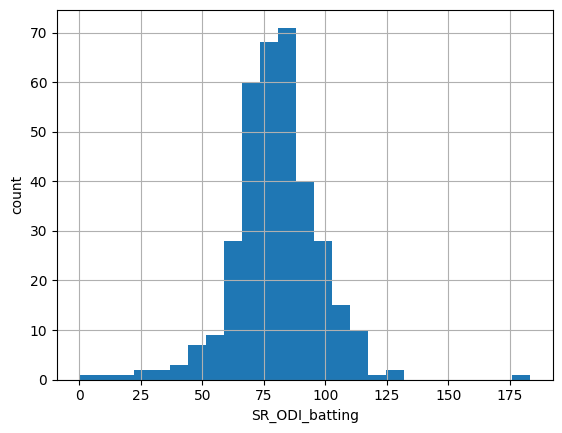

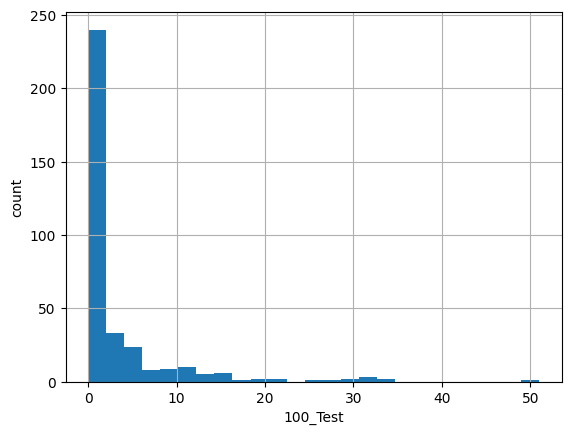

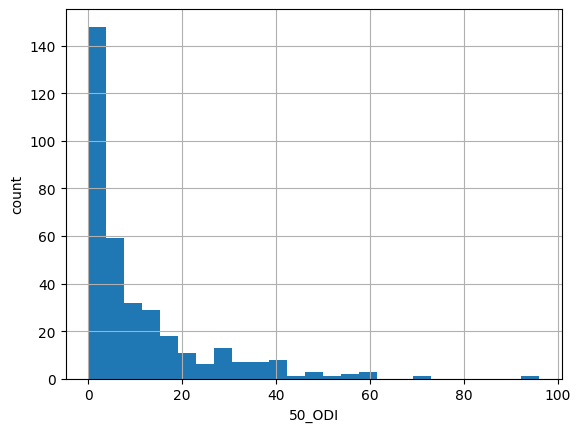

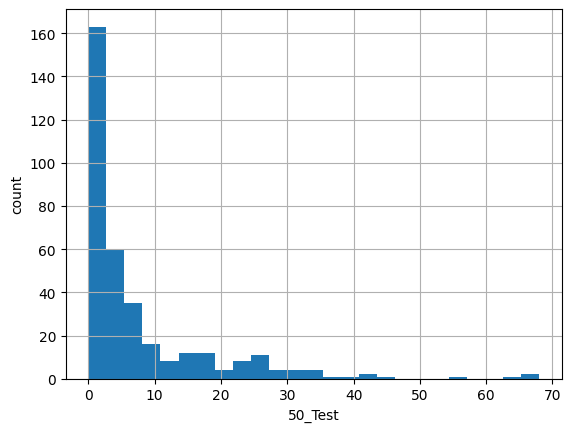

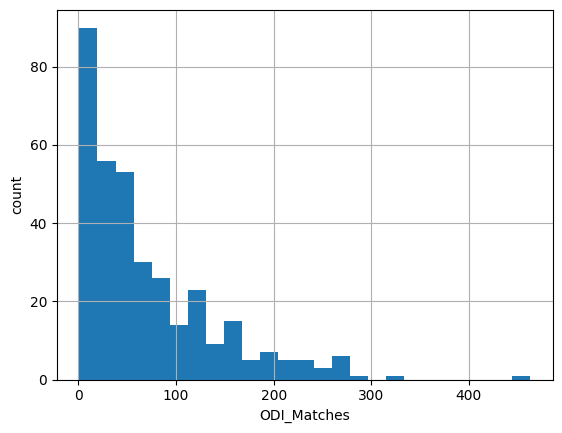

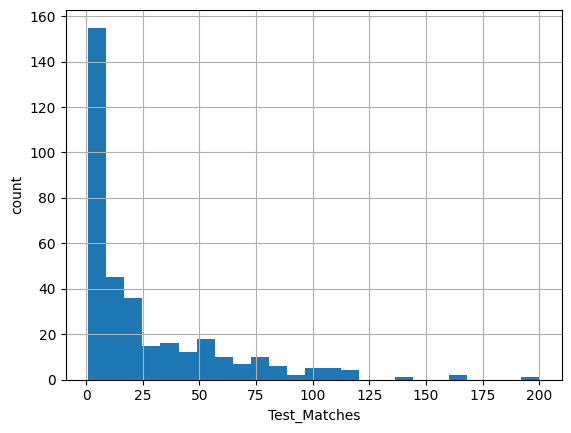

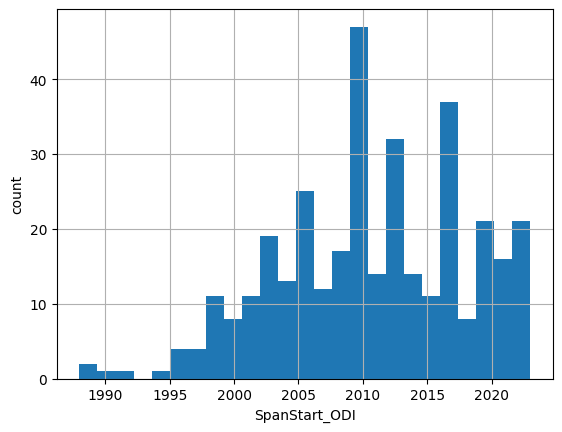

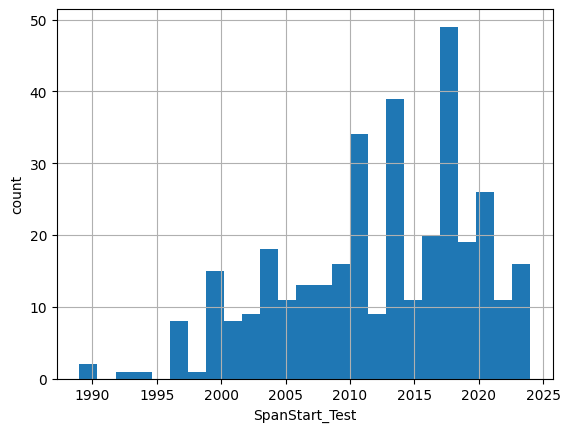

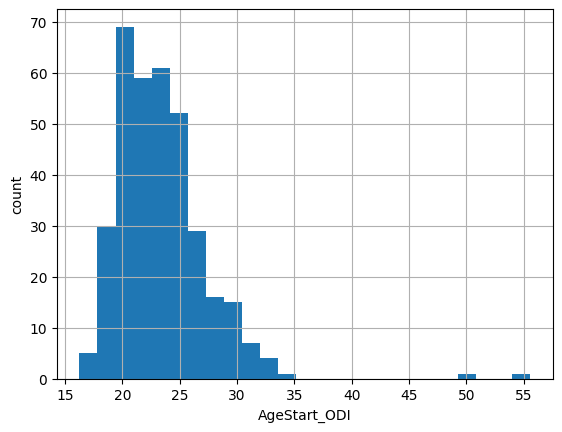

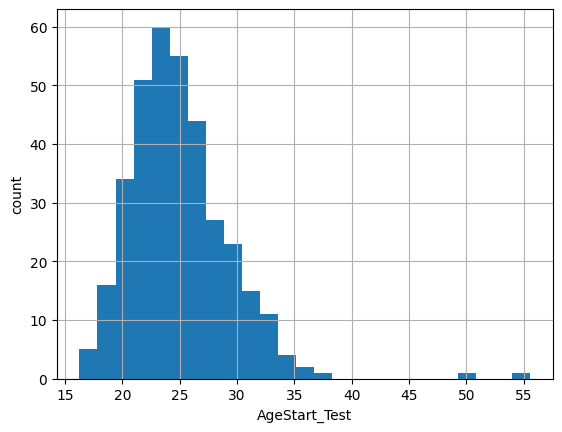

In [325]:
for feature in continuous_features:
    data = df_bat_t20.copy()
    
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

#### Categorical Features

In [326]:
cat_features = [feature for feature in df_bat_t20.columns if feature not in num_features]
df_bat_t20[cat_features].head()

,Player Name,Batting Style,Playing Role,Country
0,A Athanaze,Left hand Bat,Batter,WI
1,A Balbirnie,Right hand Bat,Batter,IRE
2,A Dananjaya,Left hand Bat,Allrounder,SL
3,A Symonds,Right hand Bat,Allrounder,AUS
4,AB Barath,Right hand Bat,Batter,WI


In [327]:
for feature in cat_features:
    print('{}: {} categories'.format(feature, len(df_bat_t20[feature].unique())))

Player Name: 350 categories
Batting Style: 2 categories
Playing Role: 2 categories
Country: 12 categories


In [328]:
cat_features.remove('Player Name')

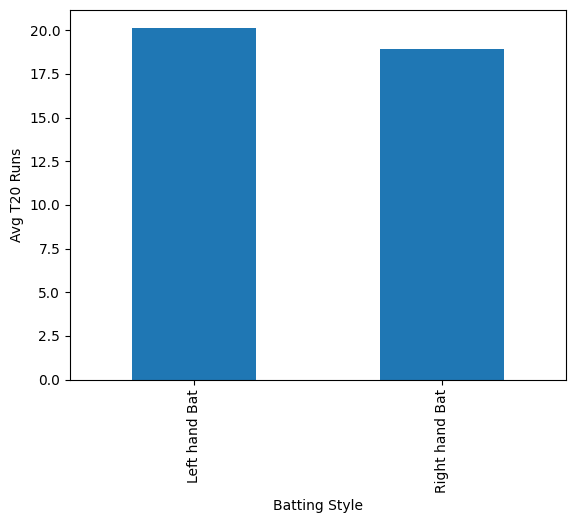

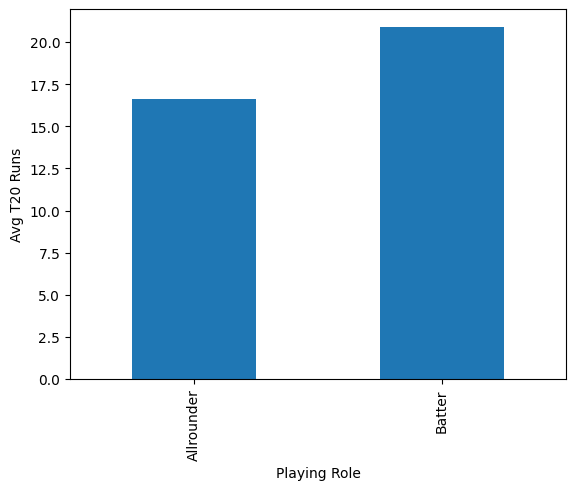

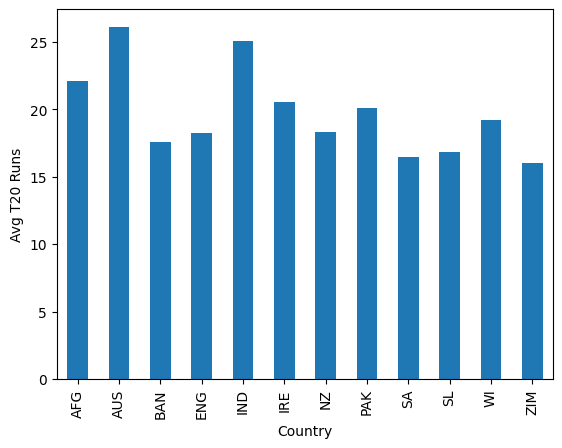

In [329]:
## relationship with Avg Runs

for feature in cat_features:
    data = df_bat_t20.copy()
    
    data.groupby(feature)['Ave_T20_batting'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Avg T20 Runs')
    plt.show()

#### Feature Engineering

In [330]:
dataset = df_bat_t20.copy()
dataset.head()

,Player Name,Batting Style,Playing Role,Innings_ODI_batting,Innings_Test_batting,NO_ODI,NO_Test,Runs_ODI_batting,Runs_Test_batting,HS_ODI,...,50_Test,0_ODI,0_Test,ODI_Matches,Test_Matches,Country,SpanStart_ODI,SpanStart_Test,AgeStart_ODI,AgeStart_Test
0,A Athanaze,Left hand Bat,Batter,10,13,0,0,288,310,66,...,1,0,1,10,7,WI,2023,2023,24.643836,24.643836
1,A Balbirnie,Right hand Bat,Batter,102,18,8,1,3008,401,145,...,4,7,3,108,9,IRE,2010,2018,19.586301,27.586301
2,A Dananjaya,Left hand Bat,Allrounder,30,10,6,2,291,135,50,...,0,3,3,40,6,SL,2012,2018,18.819178,24.819178
3,A Symonds,Right hand Bat,Allrounder,161,41,33,5,5088,1462,156,...,10,15,4,198,26,AUS,1998,2004,23.080000,29.080000
4,AB Barath,Right hand Bat,Batter,14,28,1,0,394,657,113,...,4,2,2,14,15,WI,2010,2009,20.290411,19.290411


##### Converting Categorical features to Numerical features

In [331]:
for feature in cat_features:
    ordinal_labels = dataset.groupby(feature)['Ave_T20_batting'].max().sort_values().index
    ordinal_dict = {k:i for i, k in enumerate(ordinal_labels, 0)}
    print(ordinal_dict)
    dataset[feature] = df_bat_odi[feature].map(ordinal_dict)

{'Left hand Bat': 0, 'Right hand Bat': 1}
{'Allrounder': 0, 'Batter': 1}
{'BAN': 0, 'IRE': 1, 'SL': 2, 'ZIM': 3, 'AFG': 4, 'NZ': 5, 'SA': 6, 'AUS': 7, 'IND': 8, 'PAK': 9, 'ENG': 10, 'WI': 11}


In [332]:
dataset.drop(['Player Name'], axis = 1, inplace = True)
dataset.head()

,Batting Style,Playing Role,Innings_ODI_batting,Innings_Test_batting,NO_ODI,NO_Test,Runs_ODI_batting,Runs_Test_batting,HS_ODI,HS_Test,...,50_Test,0_ODI,0_Test,ODI_Matches,Test_Matches,Country,SpanStart_ODI,SpanStart_Test,AgeStart_ODI,AgeStart_Test
0,0,1,10,13,0,0,288,310,66,82,...,1,0,1,10,7,11,2023,2023,24.643836,24.643836
1,1,1,102,18,8,1,3008,401,145,95,...,4,7,3,108,9,1,2010,2018,19.586301,27.586301
2,0,0,30,10,6,2,291,135,50,43,...,0,3,3,40,6,2,2012,2018,18.819178,24.819178
3,1,0,161,41,33,5,5088,1462,156,162,...,10,15,4,198,26,7,1998,2004,23.080000,29.080000
4,1,1,14,28,1,0,394,657,113,104,...,4,2,2,14,15,11,2010,2009,20.290411,19.290411


In [333]:
dataset.to_csv('Data/Final/t20_bat_processed_data.csv', index = False)

#### Modelling

In [334]:
df = pd.read_csv('Data/Final/t20_bat_processed_data.csv')
df.head()

,Batting Style,Playing Role,Innings_ODI_batting,Innings_Test_batting,NO_ODI,NO_Test,Runs_ODI_batting,Runs_Test_batting,HS_ODI,HS_Test,...,50_Test,0_ODI,0_Test,ODI_Matches,Test_Matches,Country,SpanStart_ODI,SpanStart_Test,AgeStart_ODI,AgeStart_Test
0,0,1,10,13,0,0,288,310,66,82,...,1,0,1,10,7,11,2023,2023,24.643836,24.643836
1,1,1,102,18,8,1,3008,401,145,95,...,4,7,3,108,9,1,2010,2018,19.586301,27.586301
2,0,0,30,10,6,2,291,135,50,43,...,0,3,3,40,6,2,2012,2018,18.819178,24.819178
3,1,0,161,41,33,5,5088,1462,156,162,...,10,15,4,198,26,7,1998,2004,23.080000,29.080000
4,1,1,14,28,1,0,394,657,113,104,...,4,2,2,14,15,11,2010,2009,20.290411,19.290411


In [335]:
X = df.drop('Ave_T20_batting', axis = 1)

In [336]:
y = df['Ave_T20_batting']

##### Dropping with correlation

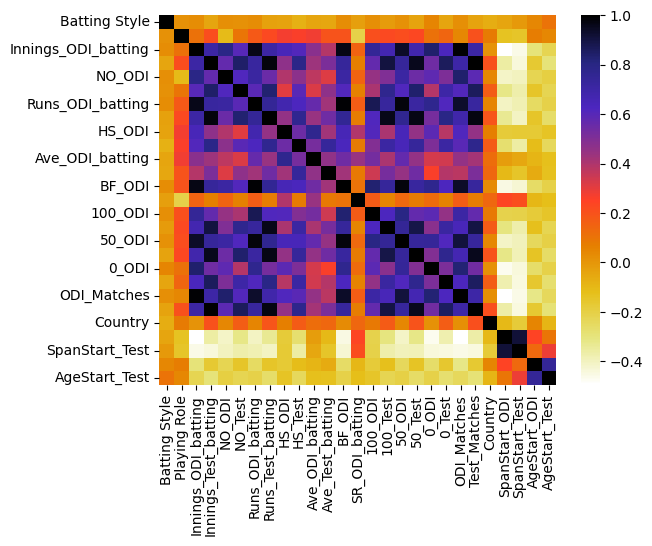

In [337]:
cor = X.corr()
sns.heatmap(cor, annot = False, cmap = plt.cm.CMRmap_r)
plt.show()

In [338]:
# Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

In [339]:
# Find features with correlation greater than 0.8
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.8)]

In [340]:
highly_correlated

['NO_Test',
 'Runs_ODI_batting',
 'Runs_Test_batting',
 'BF_ODI',
 '100_ODI',
 '100_Test',
 '50_ODI',
 '50_Test',
 '0_ODI',
 '0_Test',
 'ODI_Matches',
 'Test_Matches',
 'SpanStart_Test']

In [341]:
# Drop highly correlated features
X = X.drop(columns=highly_correlated)

In [342]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [344]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [345]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [346]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [347]:
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

Random Forest Mean Squared Error: 80.75913624085713
Random Forest R^2 Score: 0.0722036710815459


In [348]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [349]:
scores = cross_val_score(rf_model, X_train, y_train, cv=cv)
print(np.mean(scores))

0.12311431614620129


##### Inferencing with Shap

In [350]:
import shap

In [351]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

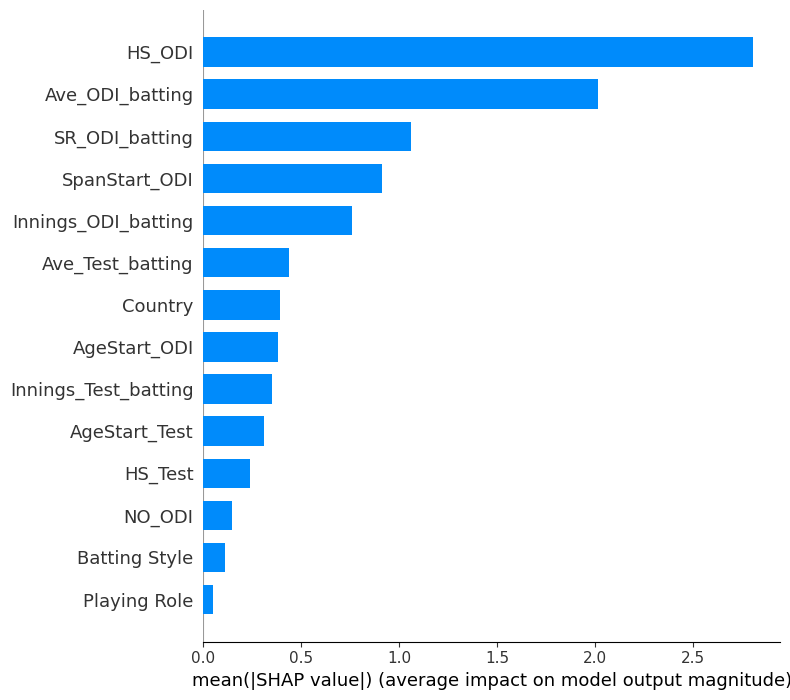

In [352]:
# Plot summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

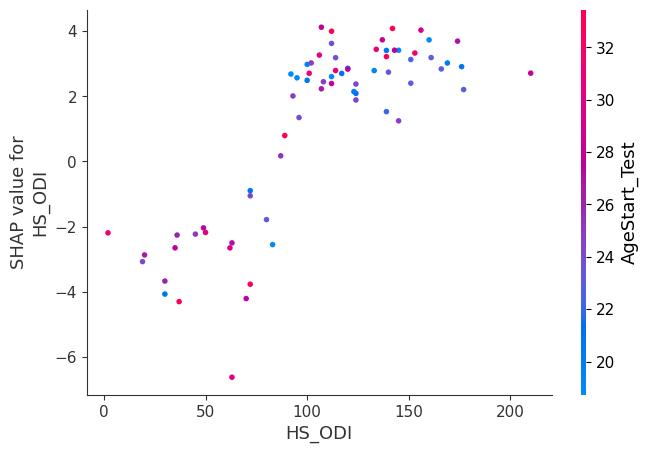

In [353]:
# Plot SHAP dependence plot for a specific feature
shap.dependence_plot("HS_ODI", shap_values, X_test) 

##### Hyperparameter Tuning

In [354]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Random Hyperparameter Grid

In [355]:
from sklearn.model_selection import RandomizedSearchCV

In [356]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ["sqrt", "log2", None]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [357]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [358]:
rf = RandomForestRegressor()

In [359]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [360]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [361]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [362]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    # Evaluate the model
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(mse))
    print('R2 = {:0.4f}'.format(r2))
    
    return r2

In [363]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 80.7591 degrees.
R2 = 0.0722


In [364]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 71.3857 degrees.
R2 = 0.1799


In [365]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 149.14%.


Grid Search CV

In [366]:
from sklearn.model_selection import GridSearchCV

In [367]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [368]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [369]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] 

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [370]:

grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 200}

In [371]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 73.0199 degrees.
R2 = 0.1611


## Final MSE and R2 Metrics

| Match Type | MSE                     | R²                   | R² (RandomizedSearch) | R² (Grid Search) |
|------------|------------------------|------------------------|-----------------------|------------------|
| ODI        |   68.904                     |   0.3489                     |   0.3667                    |   0.3406               |
| Test       |   129.321                     |    0.1858                    |   0.2545                    |   0.2463               |
| T20        |   80.759                     |   0.0722                     |  0.1220                     |  0.1805                |